# Проектный месяц. Проект №1

1. Общая информация и цель проекта
В этом проекте предполагается работа с датасетом из открытого источника. Вам потребуется разработать модель машинного обучения, а также подготовить библиотеку и интерфейс к ней для предсказания на тестовой выборке. В начале проекта вам будет доступен обучающий датасет и тестовый датасет, не содержащий правильных ответов. Метрика на тестовом датасете будет измерена в ходе проверки работы. Также вам будет доступен скрипт, с помощью которого будет измеряться финальная метрика вашей модели.


2. Задачи проекта
Предполагается, что в ходе работы над проектом будут решены следующие задачи:
-	Исследование датасета (предполагается поиск дополнительной информации для лучшего понимания природы данных)
-	Предобработка данных. Будьте внимательны: в данных могут быть бесполезные признаки, сильно скорелированные признаки а также косвенные утечки целевого признака. Некоторые колонки потребуется преобразовать к нужному типу данных.
-	Обучение модели
-	Подготовка предсказания на тестовой выборке. Обратите внимание. Файл предсказаний должен быть в csv формате и содержать 2 столбца: “id” и “prediction”. 
-	Подготовка скриптов и библиотеки для обработки данных и предсказания на тестовой выборке
-	Написание инструмента для тестирования
-	Оформление документации


3. Описание исходных данных
Данные пациентов для предсказания риска сердечных приступов
-	id  - id
-	Антропометрические параметры (вес, возраст, рост)
-	Привычки (курение, качество сна и т.д)
-	Давление
-	Наличие хронических заболеваний
-	Биохимия крови
-	Таргет - высокий или низкий риск поражения сердца

4. Используемая метрика оценки качества и сравнения моделей
В ходе анализа датасетов вам предстоит самостоятельно определить наилучшую метрику оценки качества модели и обосновать ваш выбор.


5. Стек
-	Python (ООП)
-	Pandas
-	numpy
-	Scikitlearn
-	CatBoost
-	FastAPI
-	HTML

6. Таймлайн проекта
Проект длится 2 недели и включает в себя


7. Результат
В результате у вас должно получиться приложение на FastAPI (или аналогичном фреймворке) которое принимает на вход путь к csv файлу тестовой выборки, выполняет предсказание (например, путем POST запроса к сервису) и возвращает ответ в формате JSON. Допускается для тестирования написать скрипт, который посылает запрос к запущенному ранее приложению, либо реализовать веб-интерфейс. 
Обратите внимание, что оцениваться будет помимо качества модели структурированность, понятность и чистота кода, архитектура приложения. Обязательным является использование ООП, то есть составные части приложения должны быть реализованы в виде классов. Проект должен быть оформлен в виде репозитория на github (gitlab), должна быть написана документация к сервису с описанием для пользователя и описанием классов и методов в приложении, как если бы далее ваш проект вы передавали пользователю. В jupiter ноутбуках могут быть только исследования и эксперименты, если демонстрацию результатов работы приложения вы также выносите в ноутбук - то кода приложения в ноутбуке быть не должно: он должен импортироваться в качестве внешних модулей.
Формат сдачи работы
В репозитории должны быть:
-	Jupiter Notebook с исследованием, обучением моделей и выводами
-	Код вашего приложения
-	Предсказание на тестовой выборке в требуемом формате
-	Инструкция по запуску вашего приложения ИЛИ Jupiter Notebook с демонстрацией работы приложения ИЛИ выступление на финальной встрече где вы продемонстрируете работу приложения вживую

Критерии оценки
-	Исследование и результаты обучения моделей
-	Метрика на тестовой выборке (измеряется при проверке)
-	Чистота кода и структурированность кода
-	Оформление репозитория
-	Воспроизводимость результатов


## Импорт библиотек

In [1]:
# !pip install matplotlib==3.8.3 -q

In [2]:
# !pip install seaborn==0.13.2 -q

In [3]:
# !pip install scikit-learn==1.6 -q

In [4]:
# !pip install phik -q

In [5]:
# !pip install shap -q

In [6]:
# !pip install optuna -q
# !pip install optuna-integration[sklearn] -q

In [7]:
# !pip install imbalanced-learn -q

In [8]:
# !pip install catboost -q

In [9]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import phik
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score, f1_score, recall_score, accuracy_score, \
                            r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error, \
                            make_scorer

from numpy.random import RandomState

# загружаем класс pipeline
from imblearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, \
    							  MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# импортируем класс RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from catboost import CatBoostClassifier, Pool, cv

# загружаем методы отбора признаков
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif, mutual_info_classif
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler


In [10]:
RANDOM_STATE= 57
state = RandomState(57)
TEST_SIZE= 0.25
plt.rcParams["figure.figsize"] = (12,6)

## Пользовательские функции

In [11]:
def df_hist(df, bins=20, id=0):

    # Удаление столбца id из датафрейма для создания графиков
    if id:
        df = df.drop(columns=['id'])

    # Определение целочисленных столбцов 
    count_col = df.select_dtypes('number')
    count_col = count_col.columns[count_col.nunique() < 11]

    # Создание гистограммы и boxplot для непрерывных данных
    for col in df.select_dtypes('number').drop(columns=count_col):
        fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
        df[col].hist(bins=bins, ax=ax1)
        ax1.set_title(f'Гистограмма по столбцу "{col}"')
        ax1.set_xlabel(col)
        ax1.set_ylabel('Количество')
        df.boxplot(column=col, ax=ax2, vert=False)
        ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
        ax2.set_title(f'Ящик с усами по столбцу "{col}"')
        plt.xlabel(col)
        plt.show();

    # Создание countplot для целочесленных данных
    for col in df[count_col]:
        sns.countplot(data=df, x=col)
        plt.grid(True)
        plt.ylabel('Количество')
        plt.xlabel(col)
        plt.title(f'Диаграмма по столбцу "{col}"')
        plt.show();

    # Создание countplot для категориальных данных
    for col in df.select_dtypes('object'):
        sns.countplot(data=df, x=col)
        if df[col].nunique() > 3:
            plt.xticks(rotation=90)
        plt.grid(True)
        plt.ylabel('Количество')
        plt.xlabel(col)
        plt.title(f'Диаграмма по столбцу "{col}"')
        plt.show();

In [12]:
def df_hist_dict(df_dict, bins=20, id=0):
	for key, df in df_dict.items():
		# Удаление столбца id из датафрейма для создания графиков
		if id:
			df = df.drop(columns=['id'])
		# df = df.round(2)

		# Определение целочисленных столбцов 
		count_col = df.select_dtypes('number')
		count_col = count_col.columns[count_col.nunique() < 12]

		# Создание гистограммы и boxplot для непрерывных данных
		for col in df.select_dtypes('number').drop(columns=count_col):
			fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
			df[col].hist(bins=bins, ax=ax1)
			ax1.set_title(f'Датасет {key} \nГистограмма по столбцу "{col}"')
			ax1.set_xlabel(col)
			ax1.set_ylabel('Количество')
			df.boxplot(column=col, ax=ax2, vert=False)
			ax2.tick_params(axis='y', which='both', left=False, labelleft=False)
			ax2.set_title(f'Датасет {key} \nЯщик с усами по столбцу "{col}"')
			plt.xlabel(col)
			plt.show();

		# Создание countplot для целочесленных данных
		for col in df[count_col]:
			sns.countplot(data=df.round(2), x=col)
			plt.grid(True)
			plt.ylabel('Количество')
			plt.xlabel(col)
			plt.title(f'Датасет {key} \nДиаграмма по столбцу "{col}"')
			plt.show();

		# Создание countplot для категориальных данных
		for col in df.select_dtypes('object'):
			sns.countplot(data=df, x=col)
			if df[col].nunique() > 3:
				plt.xticks(rotation=90)
			plt.grid(True)
			plt.ylabel('Количество')
			plt.xlabel(col)
			plt.title(f'Датасет {key} \nДиаграмма по столбцу "{col}"')
			plt.show();

		# Создание countplot для булевых данных
		for col in df.select_dtypes('bool'):
			sns.countplot(data=df, x=col)
			if df[col].nunique() > 3:
				plt.xticks(rotation=90)
			plt.grid(True)
			plt.ylabel('Количество')
			plt.xlabel(col)
			plt.title(f'Датасет {key} \nДиаграмма по столбцу "{col}"')
			plt.show();

In [13]:
def df_info(dict_df):
    for key, value in dict_df.items():
        print(key)
        value.info()
        display(value.head(5))
        print('----------------------------------------------------')
        print('\n')

In [14]:
def df_pred(dict_df):
    for key, value in dict_df.items():
        print(key)
        print('Явных дубликатов', value.duplicated().sum())
        print('Максимум пропусков', value.isna().sum().max())
        print('----------------------------------------------------')
        print('\n')

In [15]:
def df_value(dict_df, obj=True):
    for key, value in dict_df.items():
        print(f'Датафрейм: {key}')
        print('\n')
        for col in (value.select_dtypes('object') if obj else value).columns:
            display(value[col].value_counts())
            print('\n')
        print('----------------------------------------------------')
        print('\n')

In [16]:
def df_corr(dict_df, continuous_features=None):
    for df_k, df_v in dict_df.items():
        if continuous_features is None:
            continuous_features = df_v.select_dtypes('number').columns
        if len(df_v.columns) > 1:
            plt.figure(figsize=(15,15));
            ax = sns.heatmap(df_v.phik_matrix(interval_cols=continuous_features), annot=True, fmt='.2f', cmap='coolwarm');
            ax.set(xlabel="", ylabel="", title=f'Корреляционная матрица датафрейма {df_k}')
            plt.show();

In [17]:
def df_randomized_search_classifier(pipe, param_grid, n_iter=7):
    return RandomizedSearchCV(
    pipe, 
    param_grid, 
    cv=5,
    n_iter=n_iter,
    scoring=['roc_auc','accuracy','f1'],
    refit='f1',
    random_state=RANDOM_STATE,
    # n_jobs=-1
    )

## Загрузка данных

In [18]:
try:
    heart_train = pd.read_csv('heart_train.csv', index_col='id').sort_index()
    heart_test = pd.read_csv('heart_test.csv', index_col='id').sort_index()
except:
    heart_train = pd.read_csv('/datasets/heart_train.csv', index_col='id').sort_index()
    heart_test = pd.read_csv('/datasets/heart_test.csv', index_col='id').sort_index()

In [19]:
list_1 = ('heart_train', 'heart_test')
dict_1 = {'heart_train':heart_train,
          'heart_test':heart_test}

In [20]:
df_info(dict_1)

heart_train
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8685 entries, 1 to 9650
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medicati

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure
id,,,,,,,,,,,,,,,,,,,,,
1,7250,0.595506,0.096429,0.047663,1.0,1.0,1.0,1.0,1.0,0.752420,...,0.276623,2.0,0.666667,0.0,0.227018,0.048229,0.036512,Male,0.574194,0.569767
2,4034,0.595506,0.189286,0.047663,0.0,0.0,1.0,0.0,1.0,0.200998,...,0.057143,4.0,1.000000,0.0,0.227018,0.048229,0.036512,Male,0.187097,0.674419
4,8326,0.078652,0.792857,0.071494,1.0,0.0,1.0,1.0,0.0,0.601030,...,0.768831,1.0,0.166667,0.0,0.227018,0.048229,0.036512,Male,0.251613,0.383721
5,7880,0.078652,0.771429,0.071494,1.0,1.0,1.0,0.0,1.0,0.658864,...,0.485714,2.0,0.666667,0.0,0.227018,0.048229,0.036512,Male,0.735484,0.383721
6,5314,0.078652,0.492857,0.071494,1.0,0.0,1.0,0.0,0.0,0.849607,...,0.407792,0.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.419355,0.720930


----------------------------------------------------


heart_test
<class 'pandas.core.frame.DataFrame'>
Int64Index: 966 entries, 0 to 9644
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Pr

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure
id,,,,,,,,,,,,,,,,,,,,,
0,275,0.595506,0.314286,0.047663,0.0,0.0,1.0,0.0,0.0,0.208326,...,0.602363,0.332468,0.0,0.333333,0.227018,0.048229,0.036512,Male,0.600000,0.534884
3,95,0.078652,0.960714,0.071494,1.0,1.0,1.0,1.0,1.0,0.090557,...,0.417945,0.266234,1.0,0.500000,0.227018,0.048229,0.036512,Male,0.645161,0.593023
10,939,0.786517,0.375000,0.048579,1.0,1.0,1.0,1.0,1.0,0.173545,...,0.146128,0.971429,7.0,0.666667,0.227018,0.048229,0.036512,Female,0.593548,0.267442
14,216,0.584270,0.935714,0.066911,0.0,1.0,1.0,0.0,1.0,0.292691,...,0.596568,0.279221,2.0,0.000000,0.227018,0.048229,0.036512,Male,0.690323,0.360465
19,813,0.853933,0.160714,0.058662,0.0,1.0,1.0,1.0,0.0,0.284116,...,0.447749,0.297403,5.0,0.666667,0.227018,0.048229,0.036512,Male,0.625806,0.790698


----------------------------------------------------




### Промежуточный вывод

Необходимо перевести бинарные признаки к типу данных int.

Также необходимо удалить столбец Unnamed: 0

Также по итогу анализа столбцов, был найден признак не влияющий на целевой признак, который необходимо убрать из признаков:
- Income

Также был найден косвенно целевой признак "Troponin". Данный показатель изменяется непосредсвенно перед самим инфарктом, соответсвенно это прямой показатель инфаркта. Удалим данный признак

Также присутствуют отсутствующие бинарные признаки. Данные признаки заполним 0.

## Предобработка данных

In [21]:
df_pred(dict_1)

heart_train
Явных дубликатов 0
Максимум пропусков 243
----------------------------------------------------


heart_test
Явных дубликатов 0
Максимум пропусков 31
----------------------------------------------------




Удалим столбец Unnamed: 0

In [22]:
for k, v in dict_1.items():
    dict_1[k] = v.drop(columns=['Unnamed: 0', 'Income','Troponin'])

Заполним отсутствующие бинарные признаки нулём

In [23]:
binaries = ['Stress Level',
			'Physical Activity Days Per Week']
bools = ['Diabetes',
         'Family History',
         'Smoking','Obesity',
         'Alcohol Consumption',
		 'Previous Heart Problems',
         'Medication Use']
cat_target = ['Heart Attack Risk (Binary)']

In [24]:
for k, v in dict_1.items():
    dict_1[k].loc[:,binaries] = v.loc[:,binaries].fillna(0)
    dict_1[k].loc[:,bools] = v.loc[:,bools].fillna(0)

Переведем бинарные признаки к типу данных int

In [25]:
for k, v in dict_1.items():
    dict_1[k].loc[:,binaries] = v.loc[:,binaries].astype('int')
    dict_1[k].loc[:,bools] = v.loc[:,bools].astype('int')
dict_1['heart_train'].loc[:,'Heart Attack Risk (Binary)'] = dict_1['heart_train'].loc[:,'Heart Attack Risk (Binary)'].astype('bool')

In [26]:
dict_1['heart_train'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8685 entries, 1 to 9650
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8685 non-null   float64
 1   Cholesterol                      8685 non-null   float64
 2   Heart rate                       8685 non-null   float64
 3   Diabetes                         8685 non-null   int32  
 4   Family History                   8685 non-null   int32  
 5   Smoking                          8685 non-null   int32  
 6   Obesity                          8685 non-null   int32  
 7   Alcohol Consumption              8685 non-null   int32  
 8   Exercise Hours Per Week          8685 non-null   float64
 9   Diet                             8685 non-null   int64  
 10  Previous Heart Problems          8685 non-null   int32  
 11  Medication Use                   8685 non-null   int32  
 12  Stress Level        

Выявим неявные дубликаты с помощью посчета значений

In [27]:
df_value(dict_1)

Датафрейм: heart_train




Male      5882
Female    2560
1.0        156
0.0         87
Name: Gender, dtype: int64



----------------------------------------------------


Датафрейм: heart_test




Male      650
Female    285
1.0        22
0.0         9
Name: Gender, dtype: int64



----------------------------------------------------




Исправим значения на Male и Female. По соотношению количества каждой категории можно поняять, что 1 - Male, 0 - Female

In [28]:
for k, v in dict_1.items():
    dict_1[k]['Gender'] = v['Gender'].replace('1.0', 'Male')
    dict_1[k]['Gender'] = v['Gender'].replace('0.0', 'Female')

In [29]:
df_value(dict_1)

Датафрейм: heart_train




Male      6038
Female    2647
Name: Gender, dtype: int64



----------------------------------------------------


Датафрейм: heart_test




Male      672
Female    294
Name: Gender, dtype: int64



----------------------------------------------------




In [30]:
df_pred(dict_1)

heart_train
Явных дубликатов 0
Максимум пропусков 0
----------------------------------------------------


heart_test
Явных дубликатов 0
Максимум пропусков 0
----------------------------------------------------




In [31]:
dict_1['heart_train'] = dict_1['heart_train'].drop_duplicates()

## Исследовательский анализ

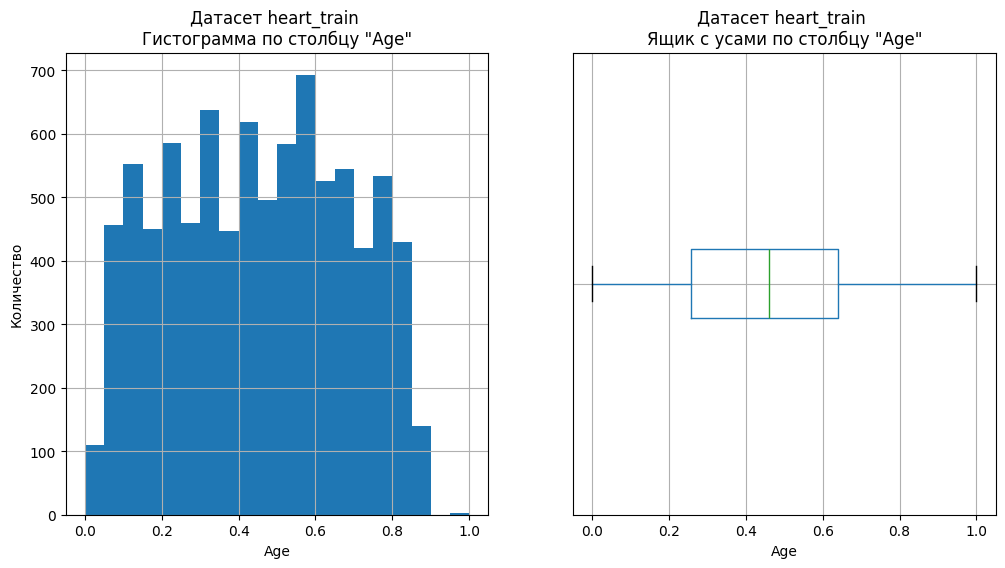

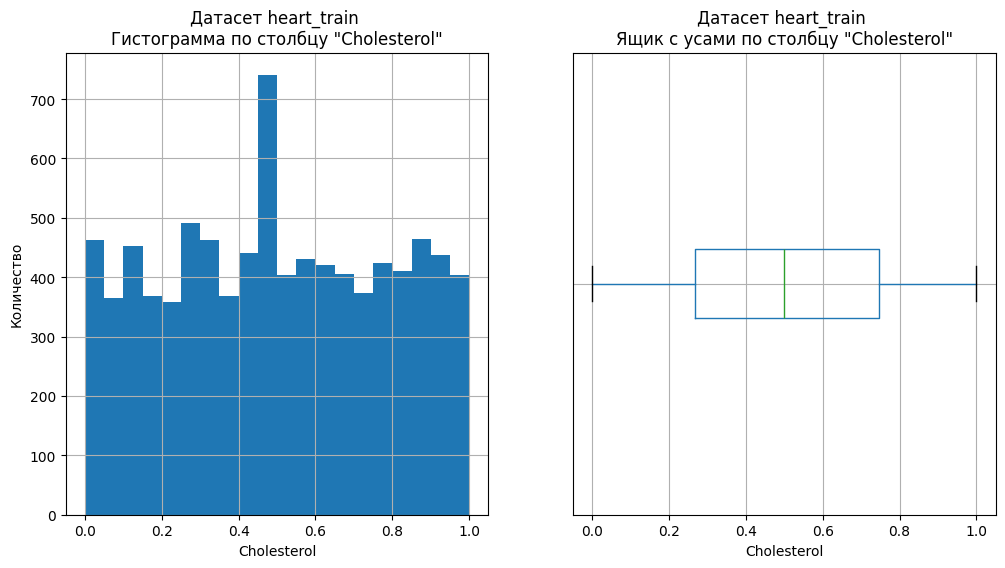

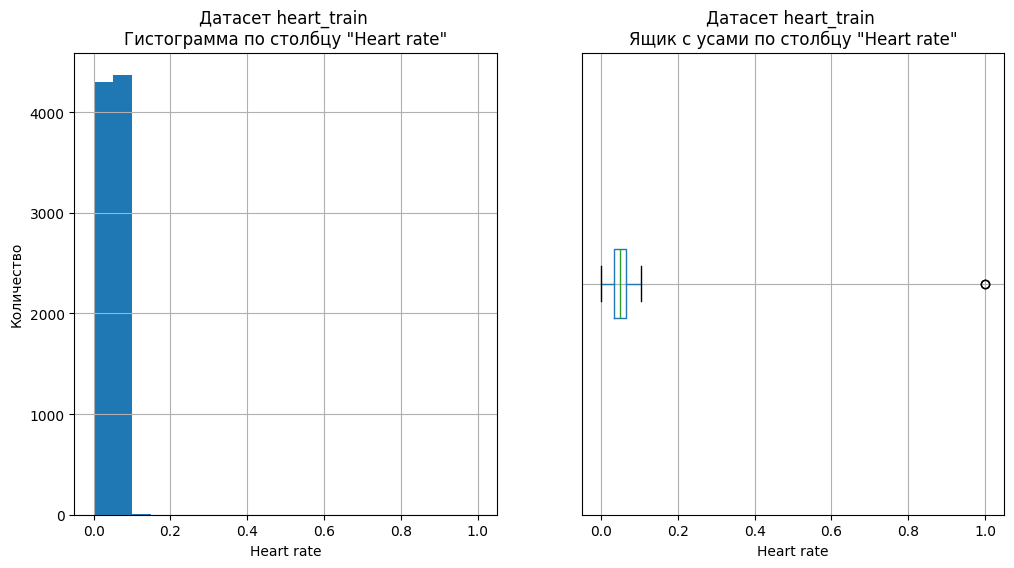

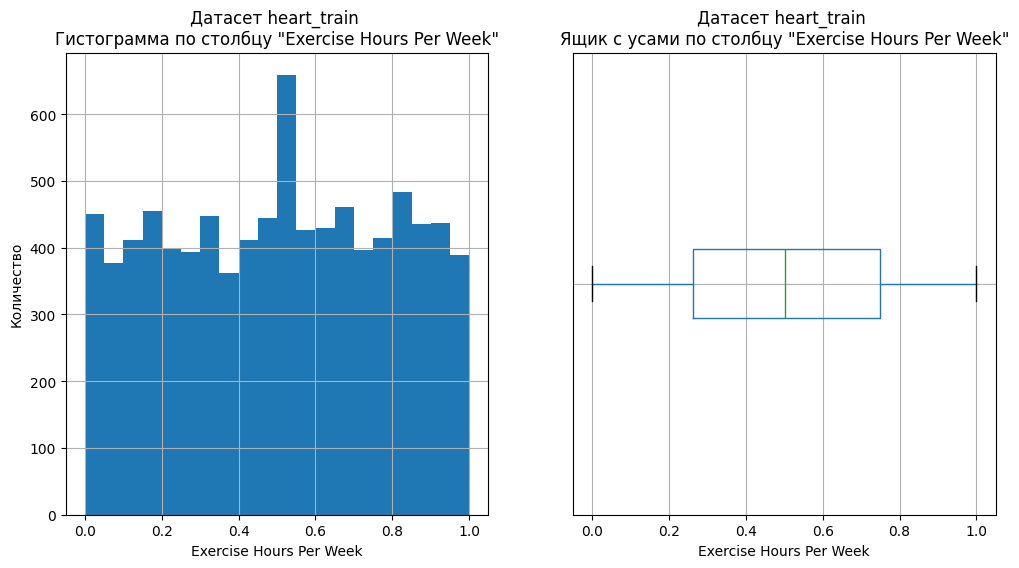

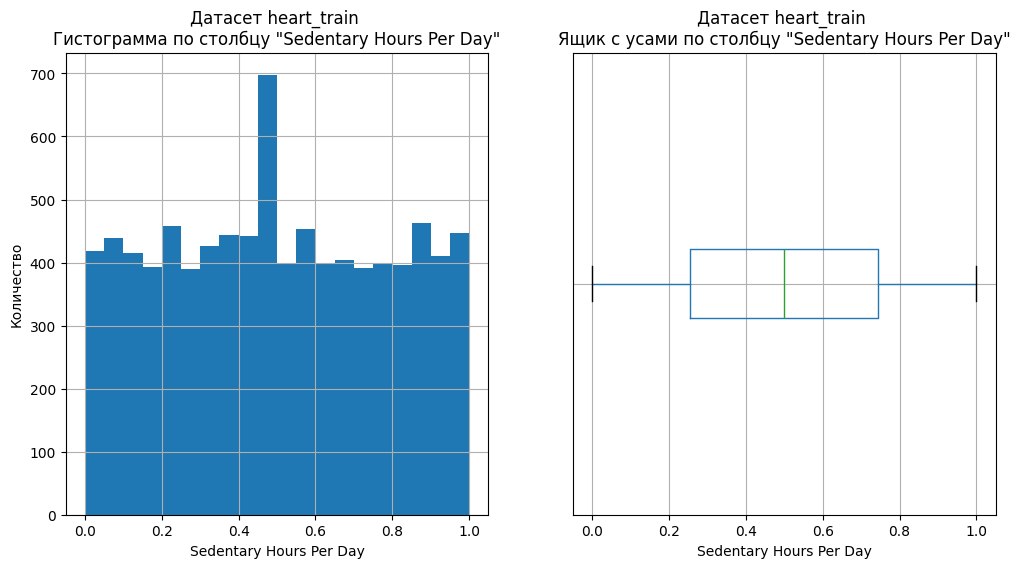

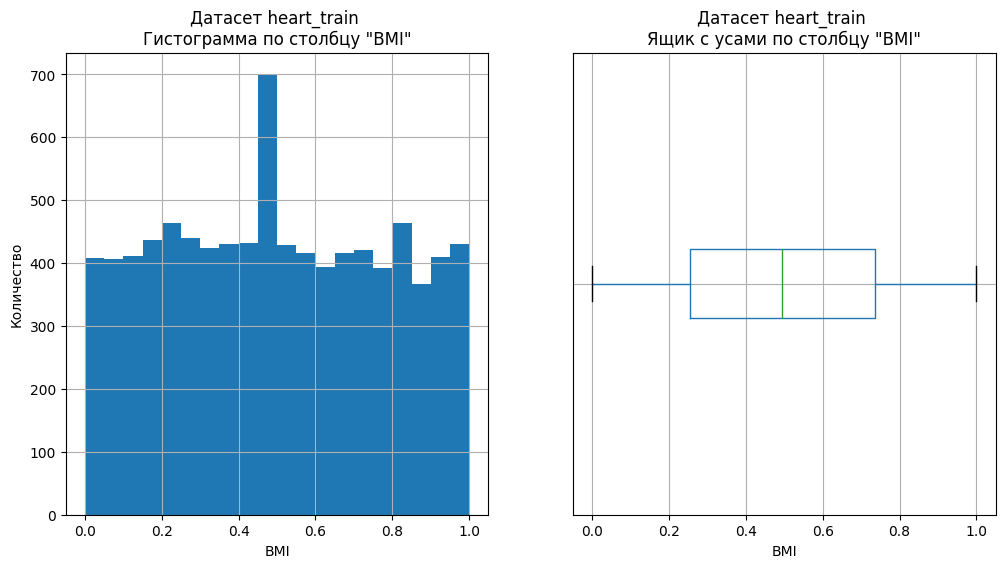

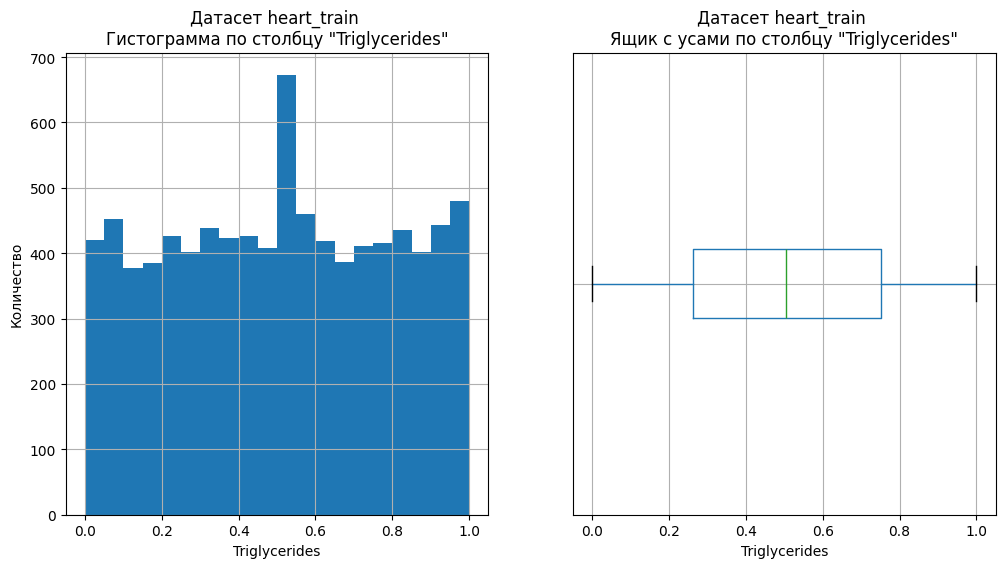

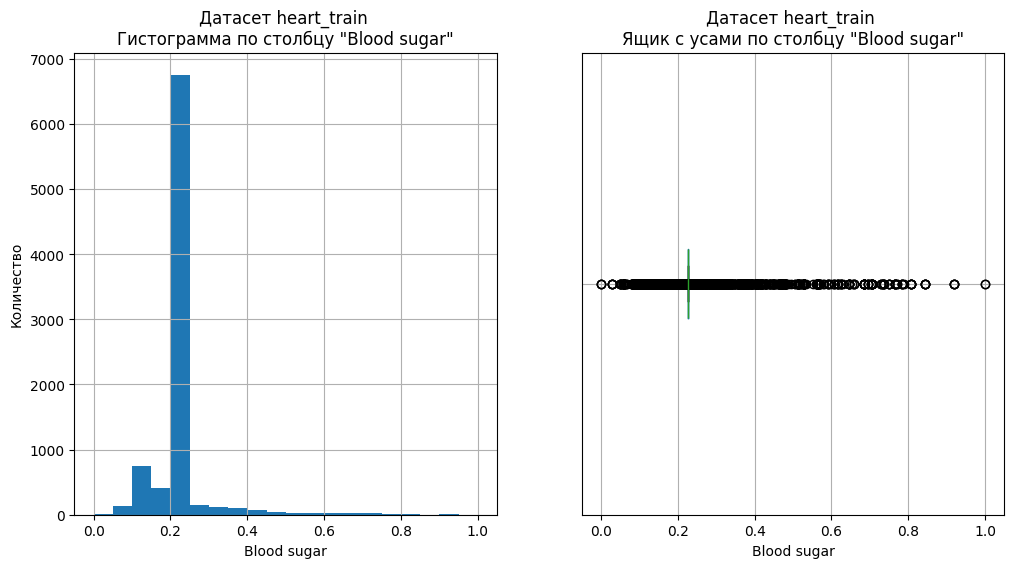

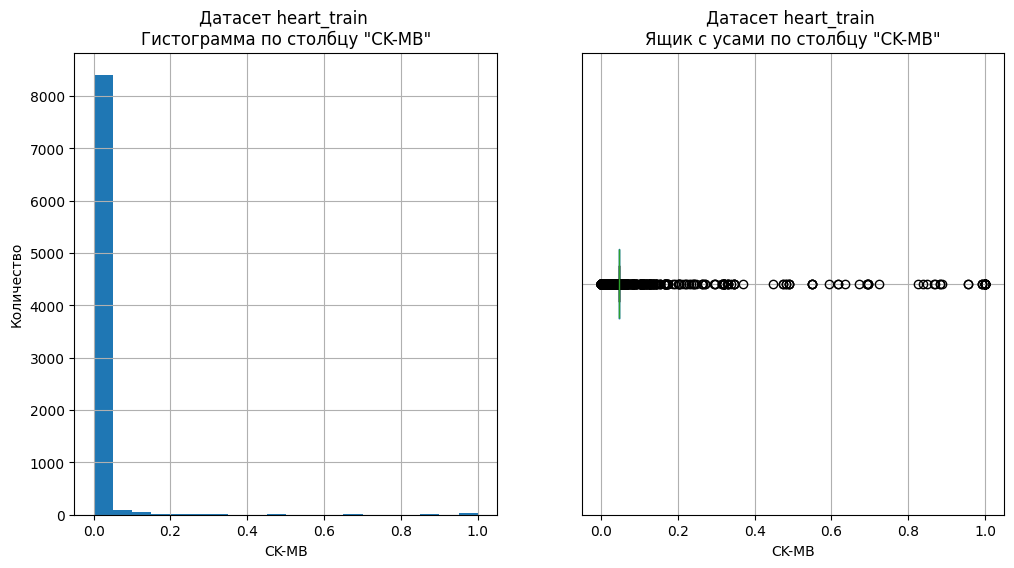

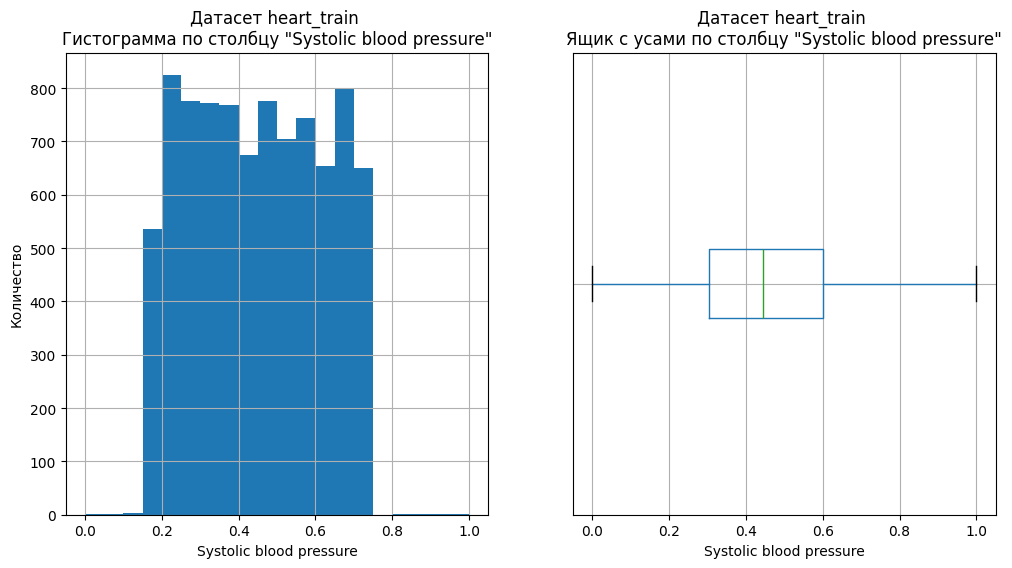

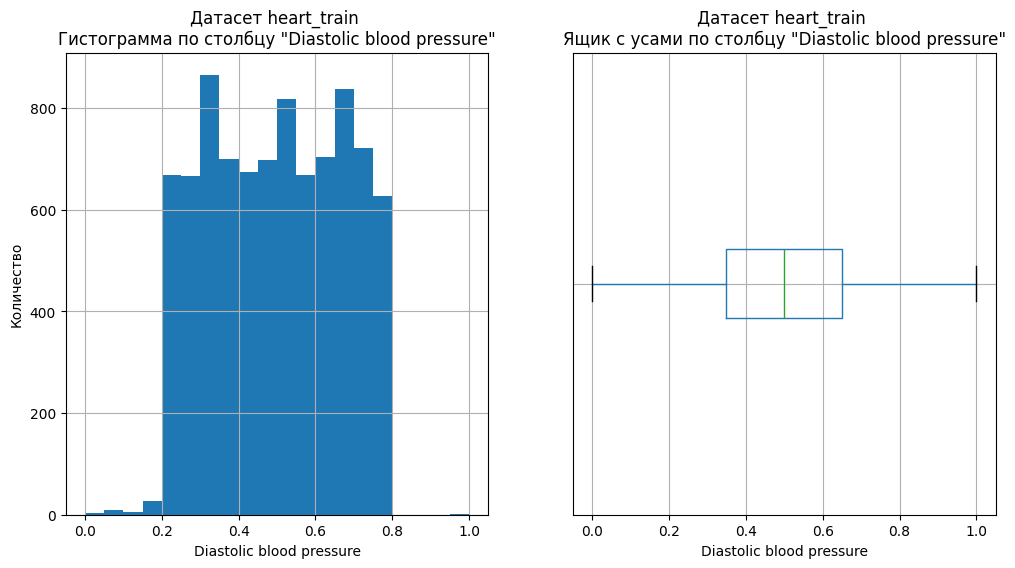

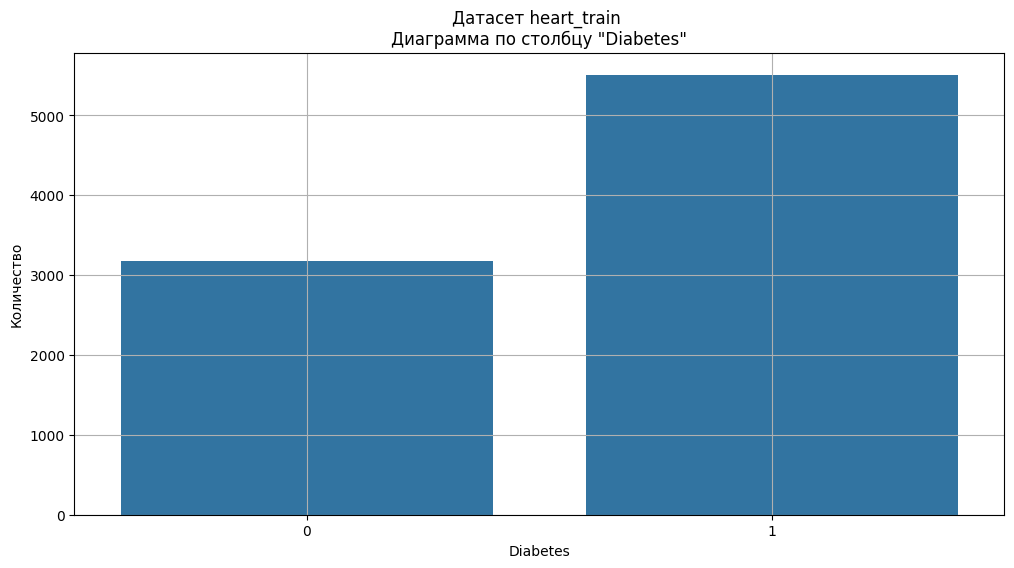

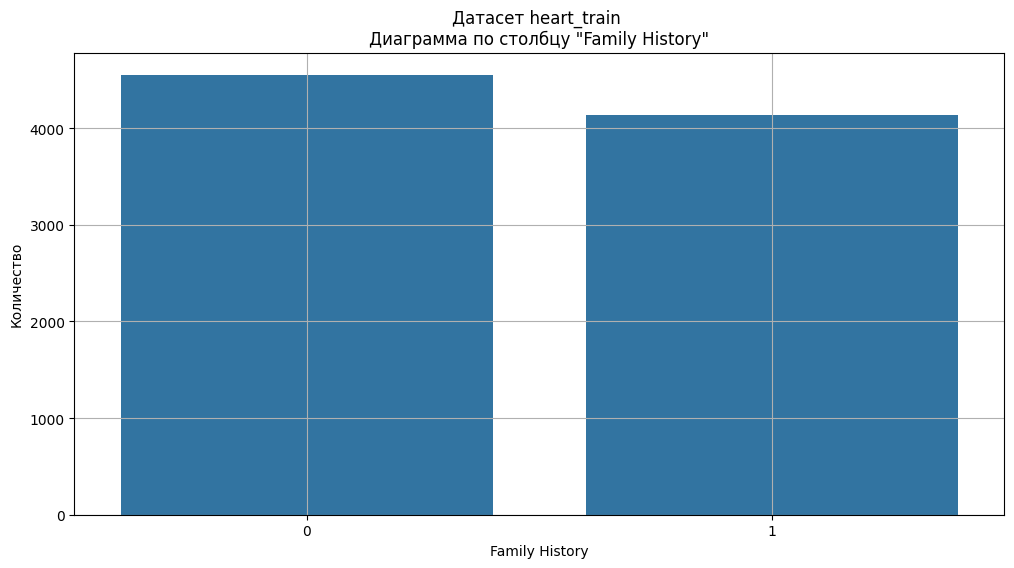

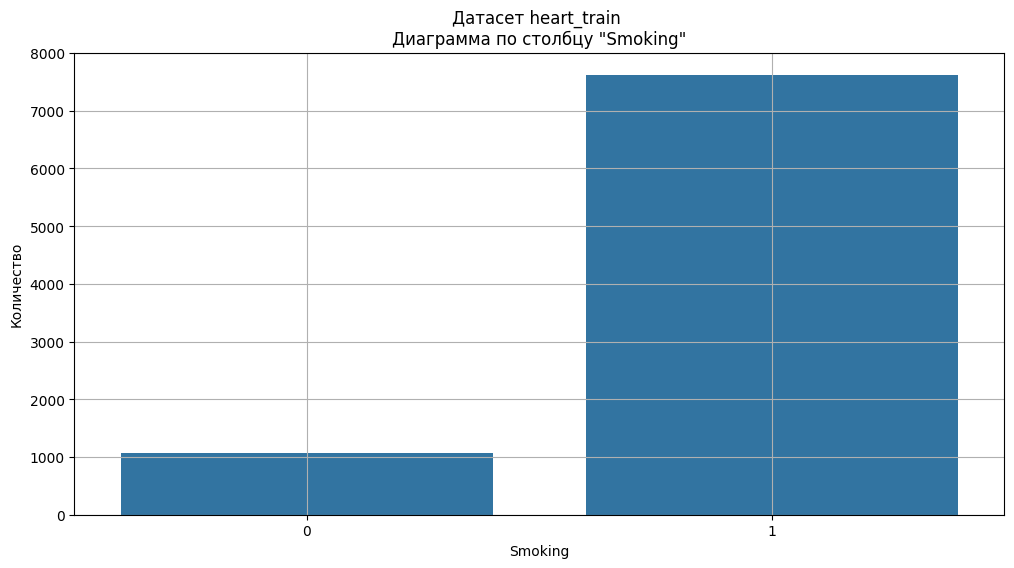

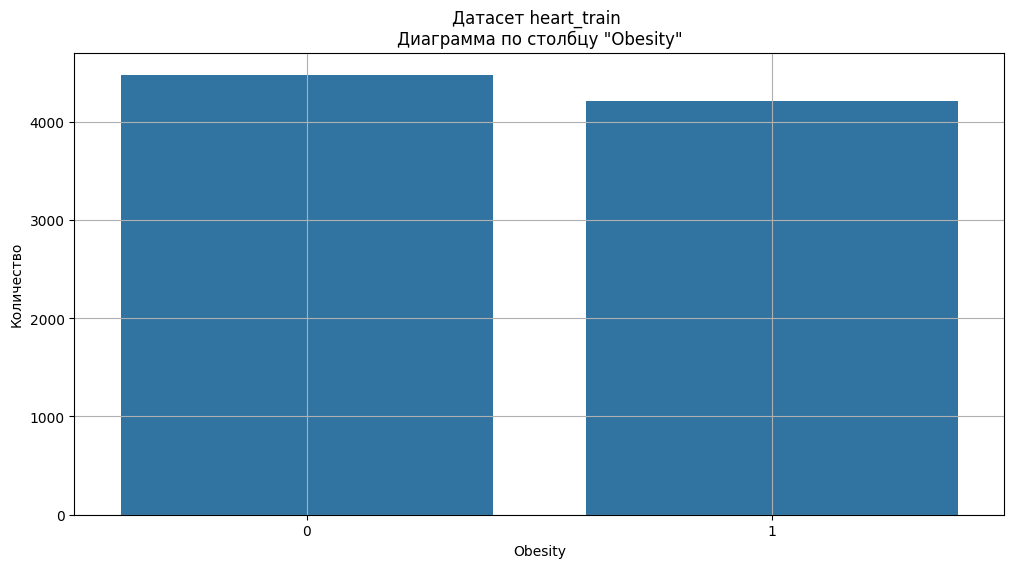

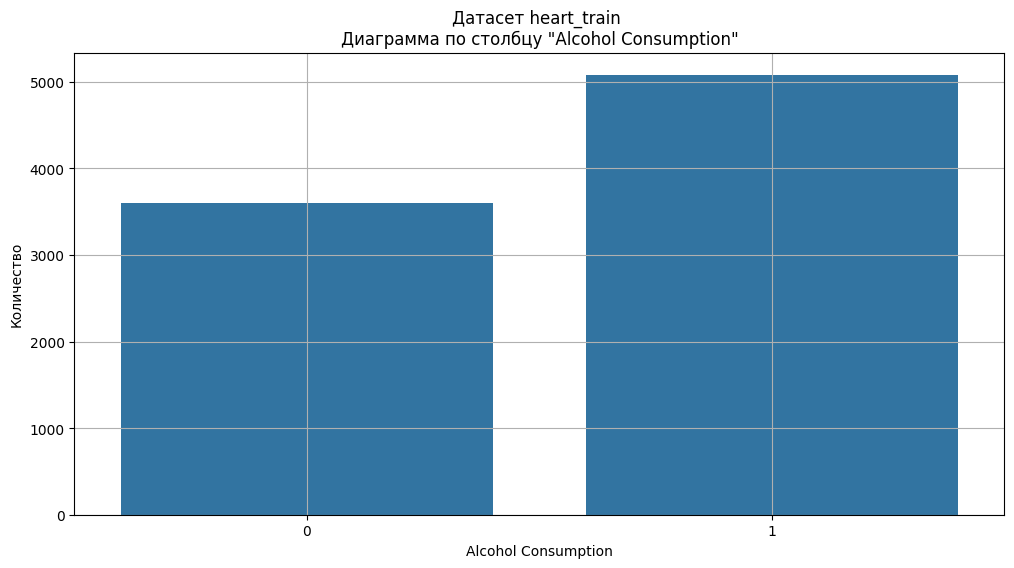

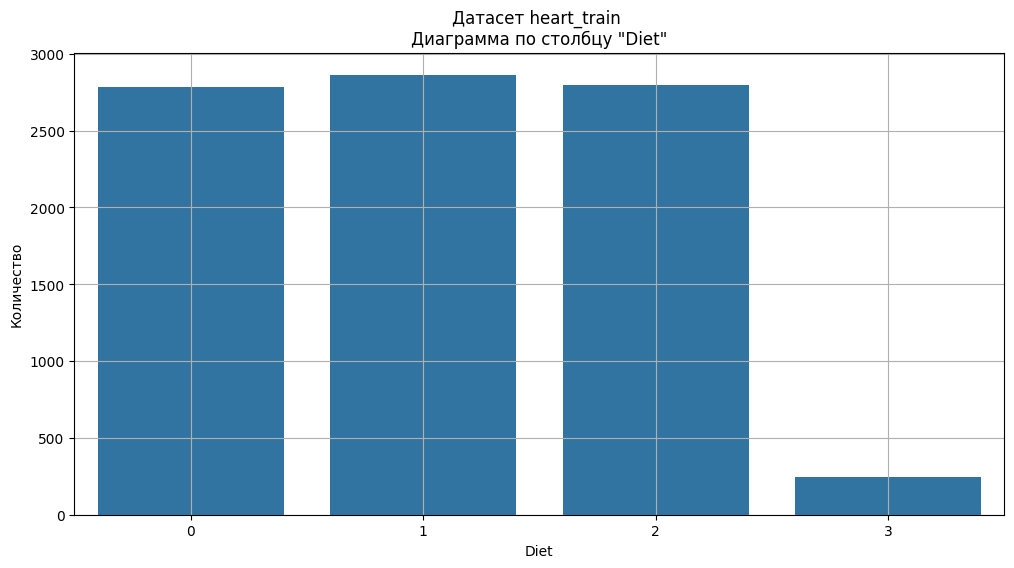

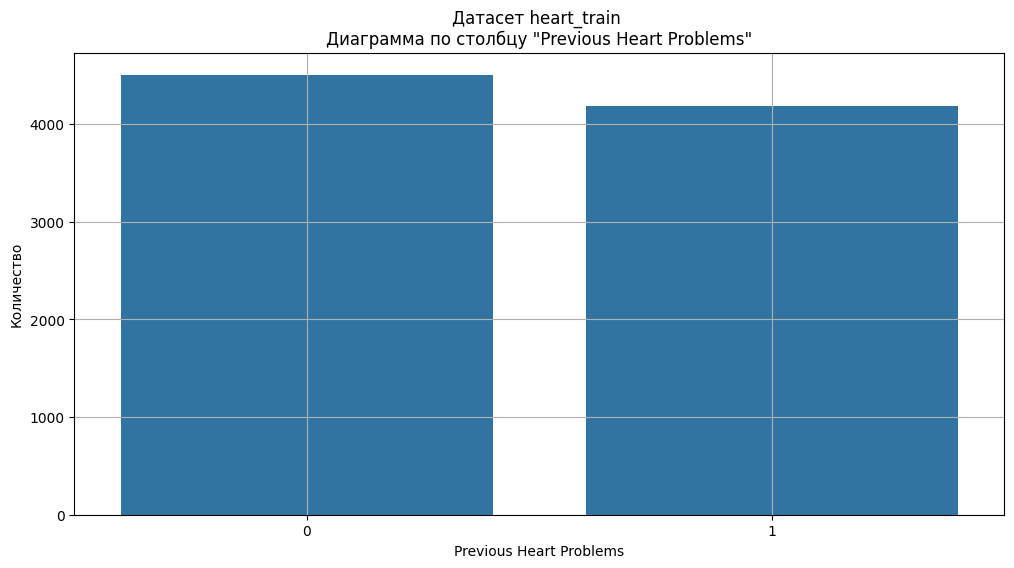

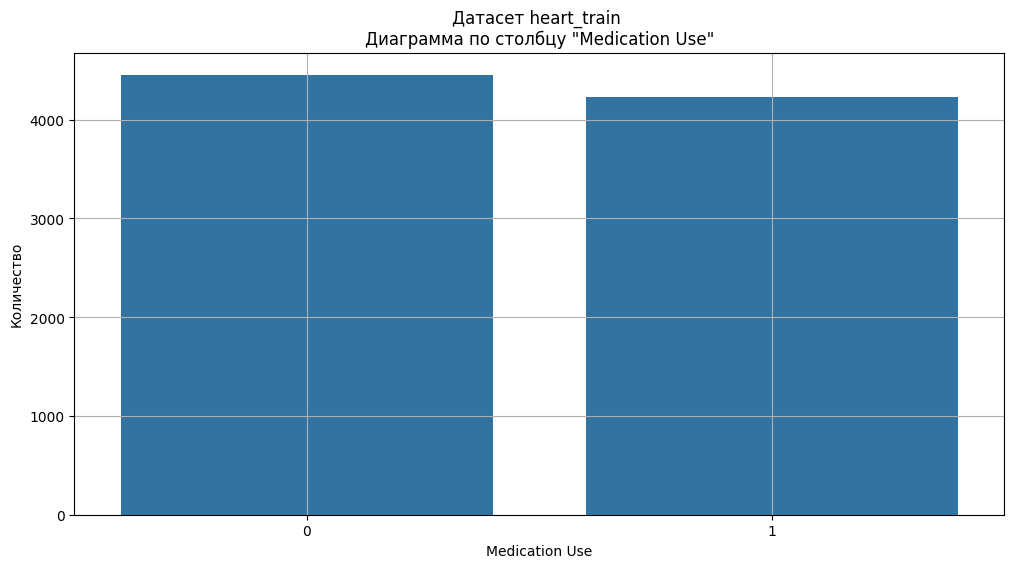

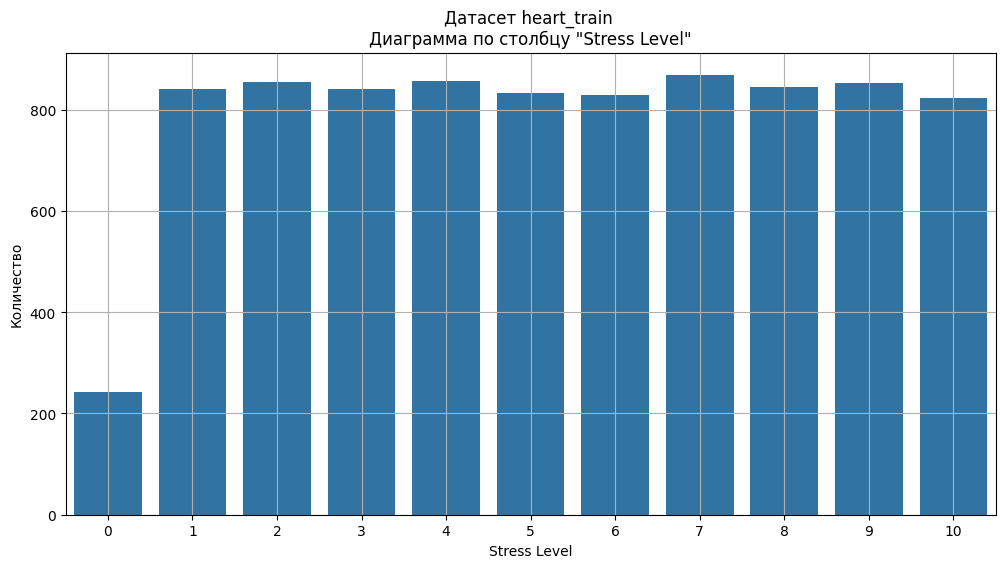

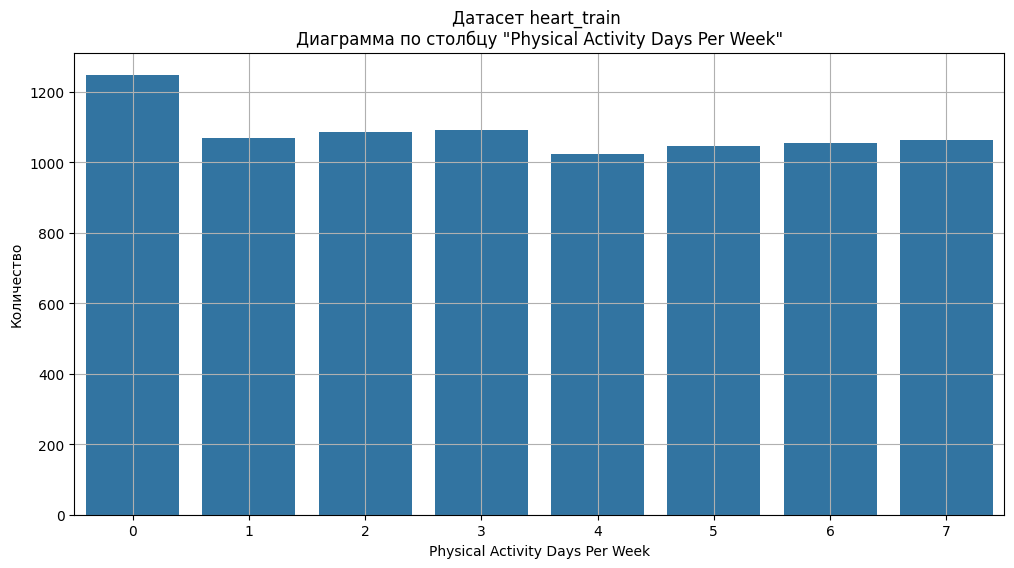

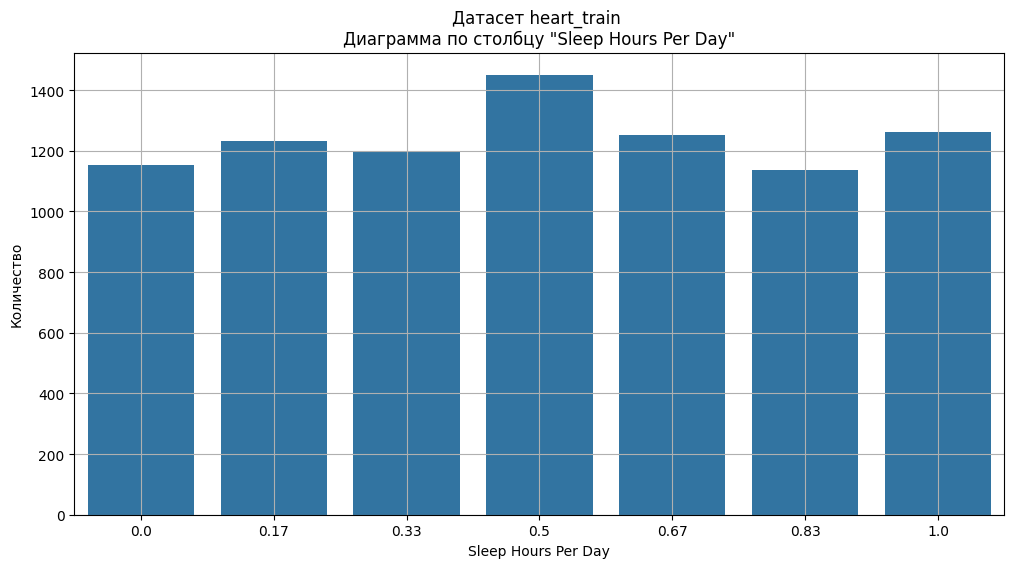

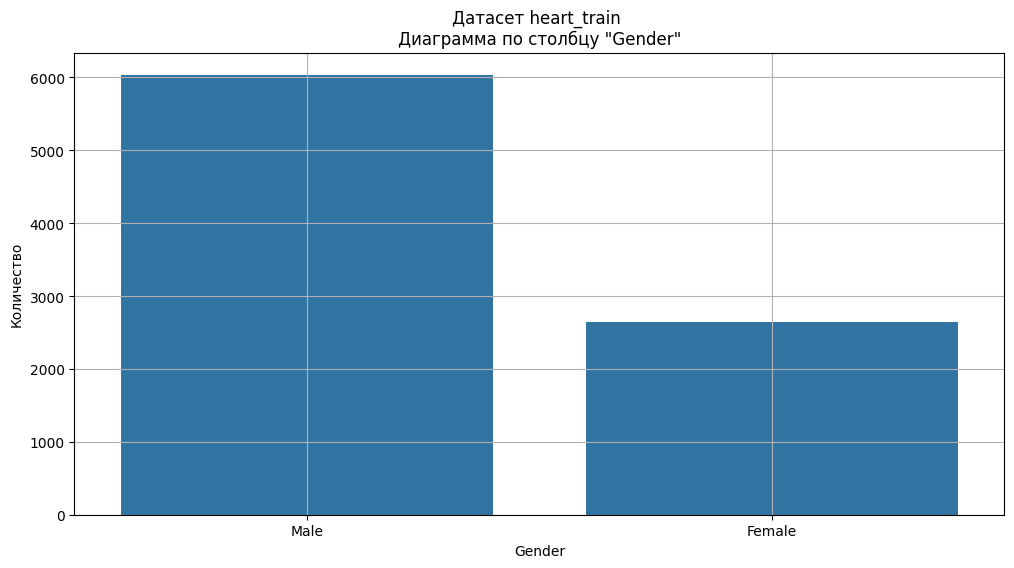

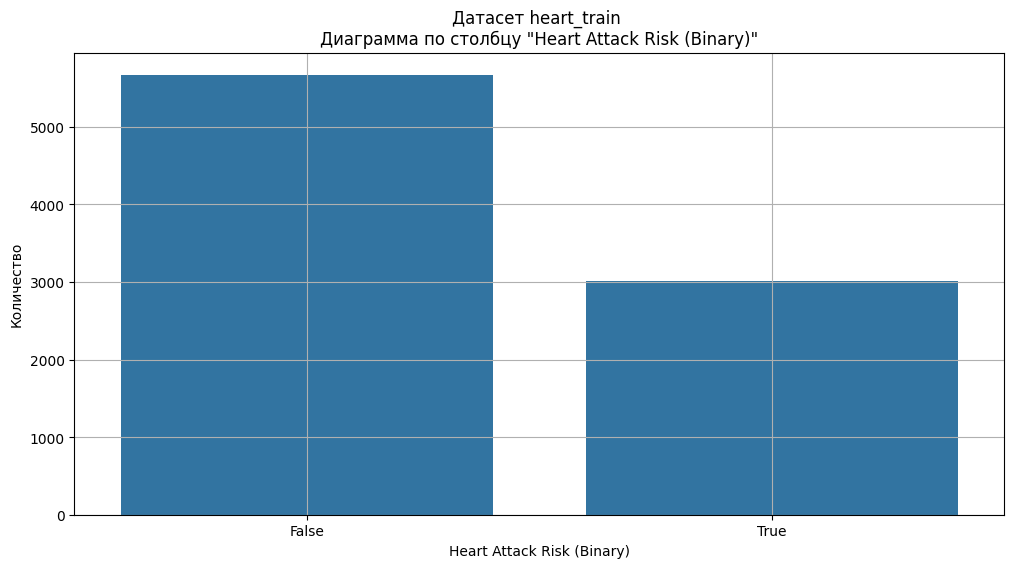

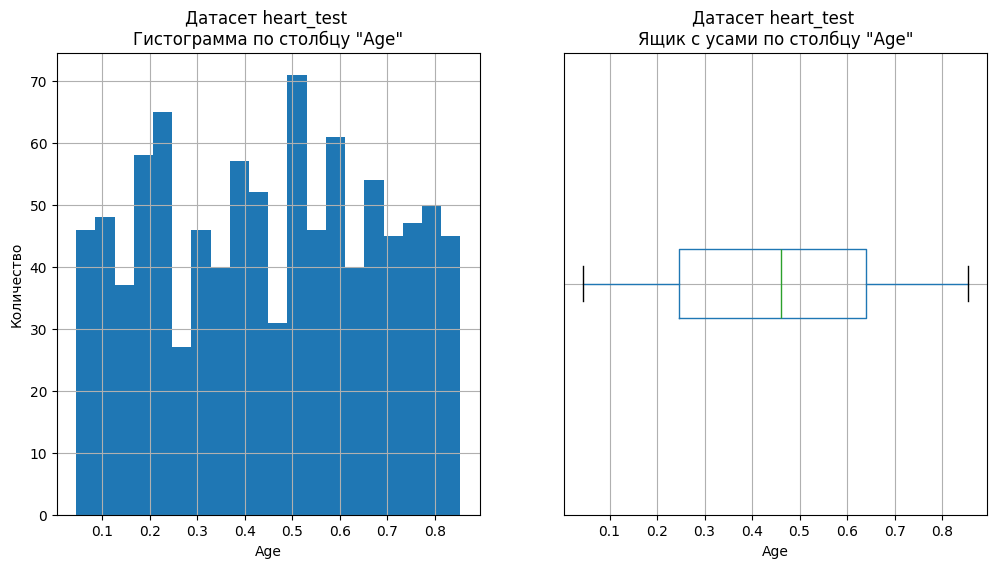

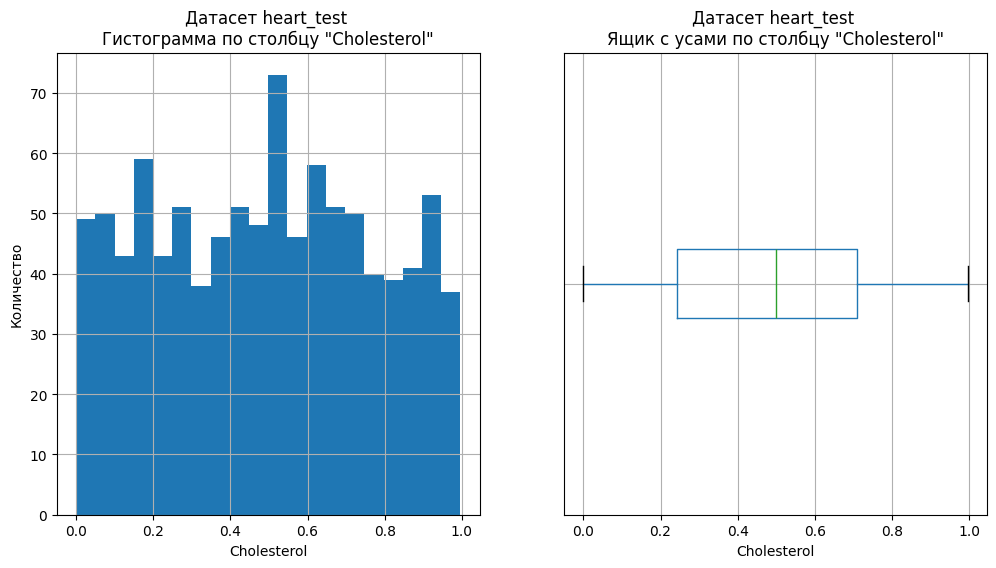

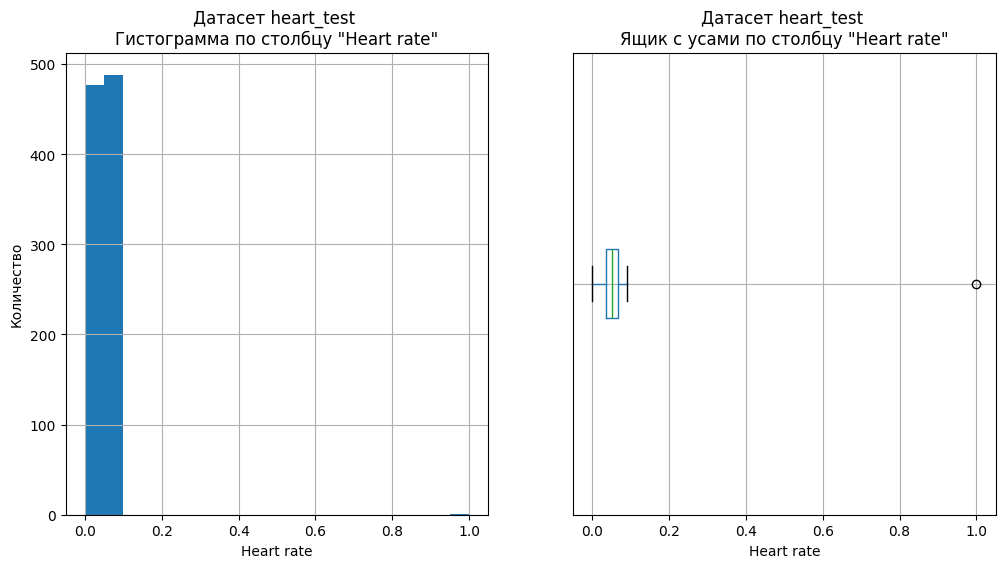

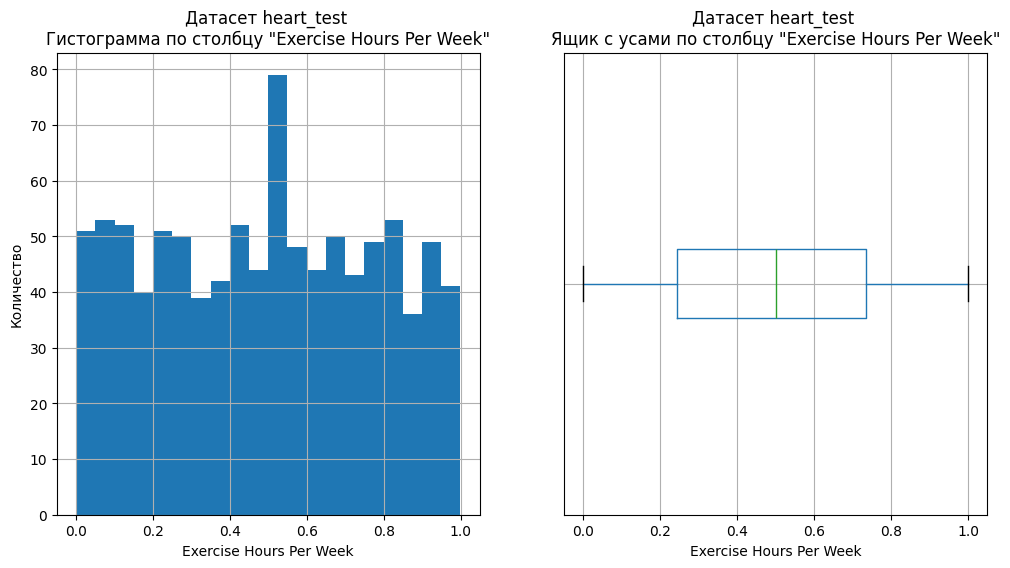

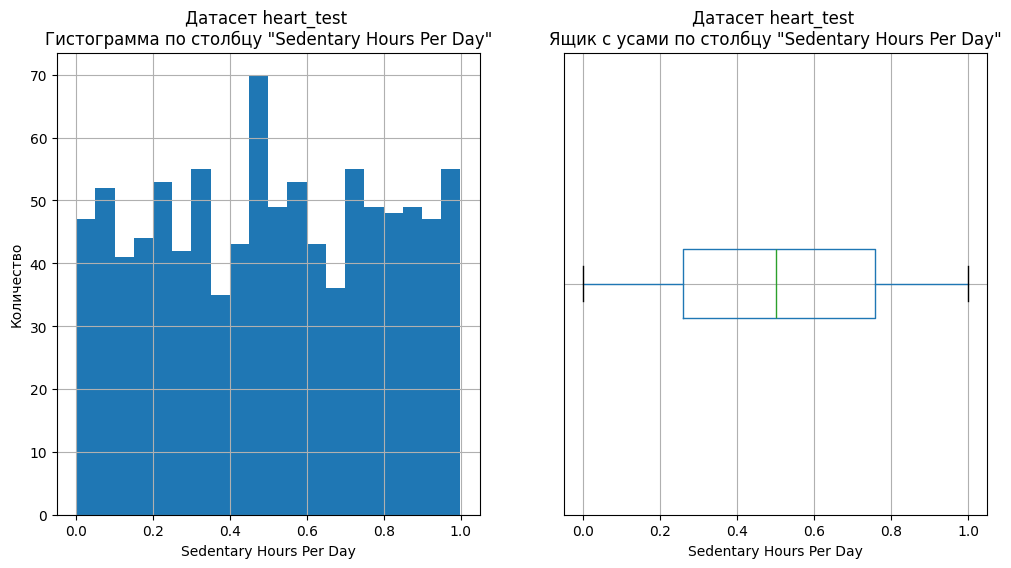

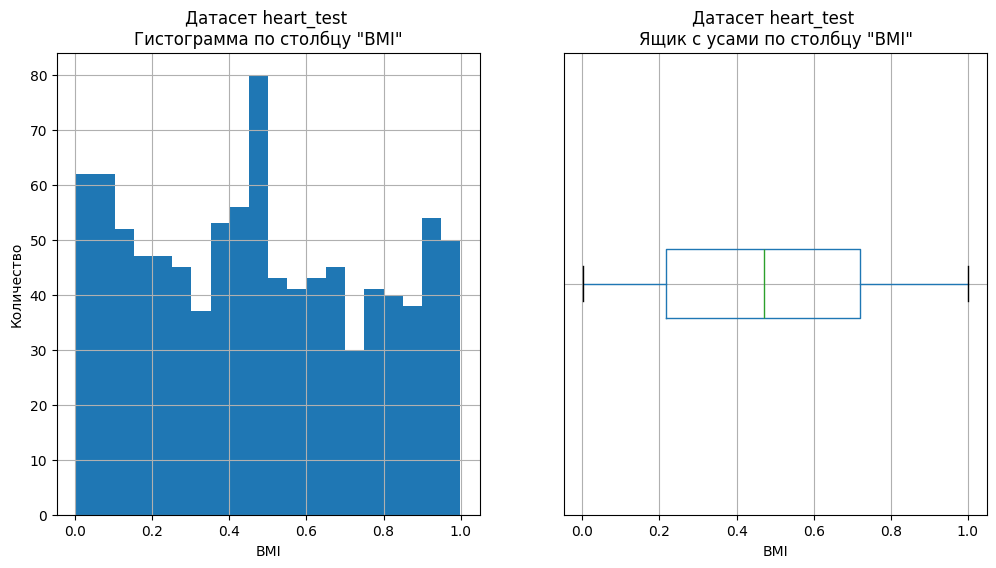

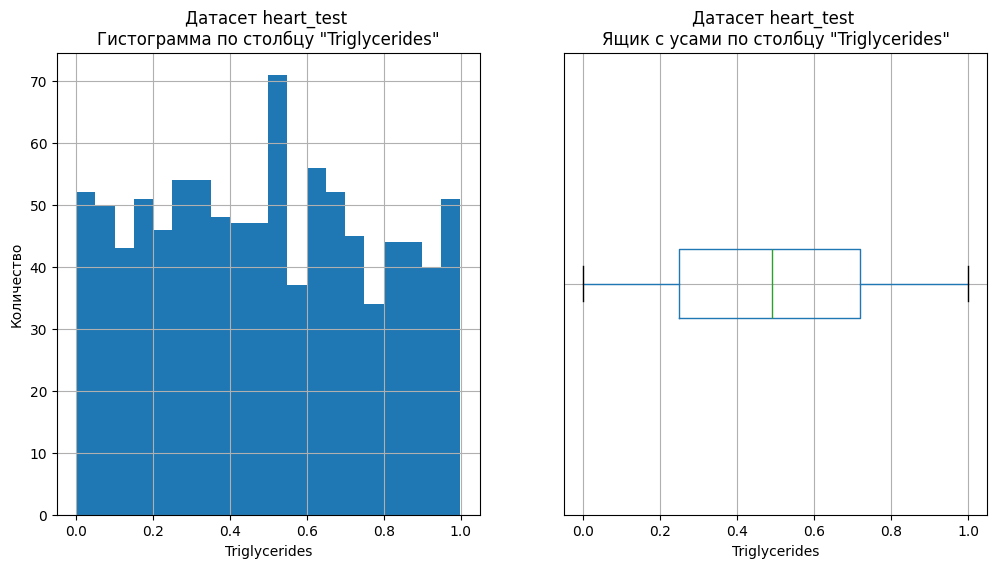

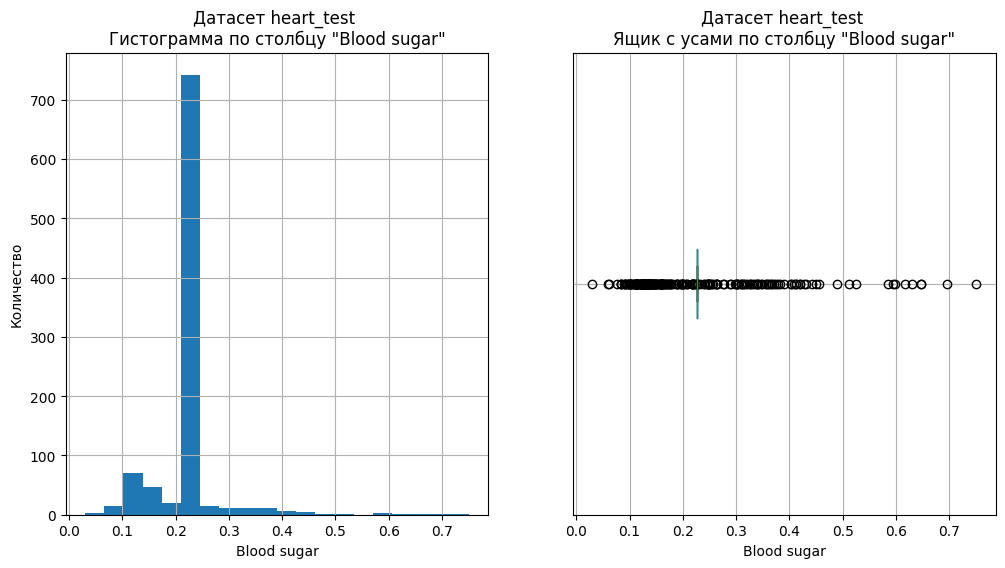

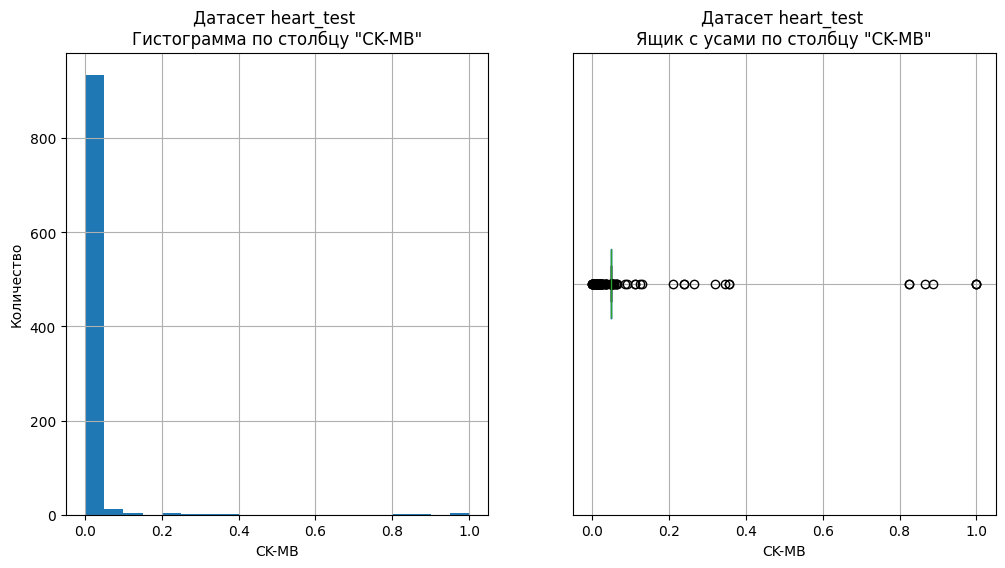

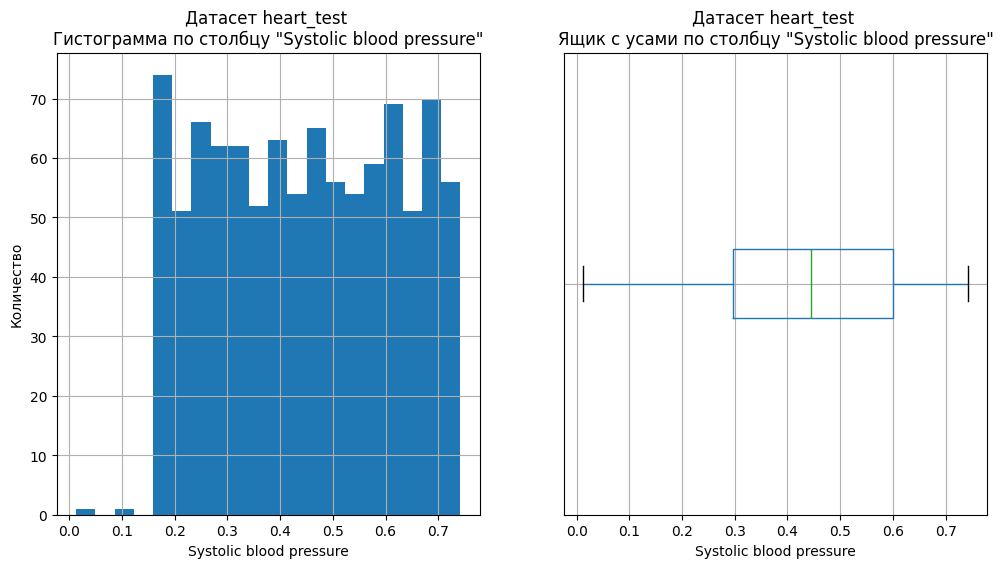

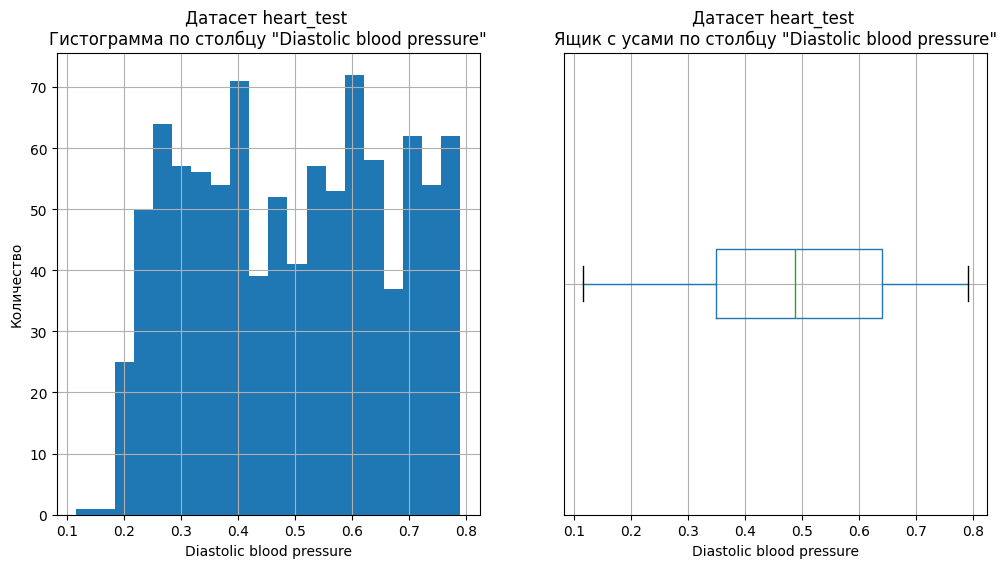

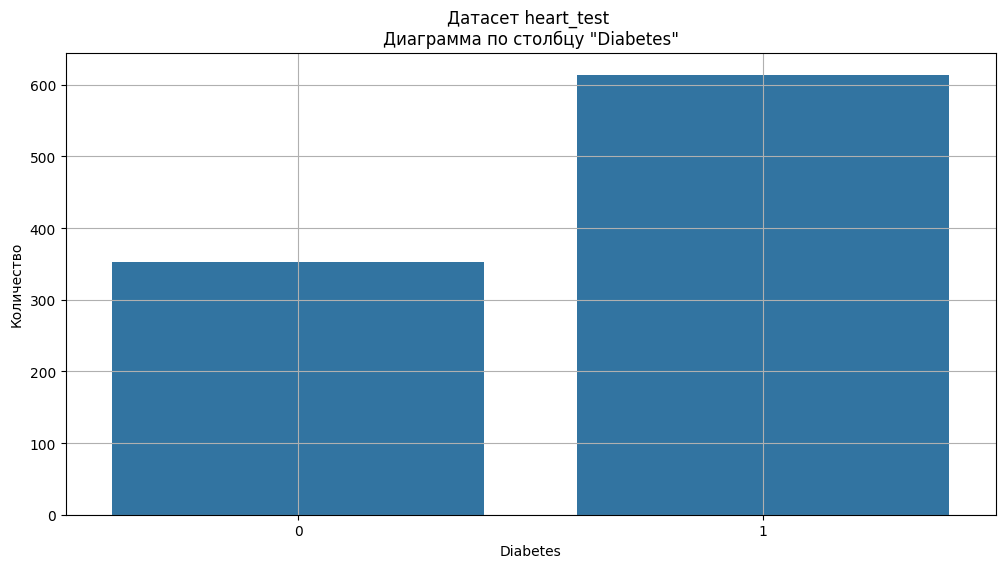

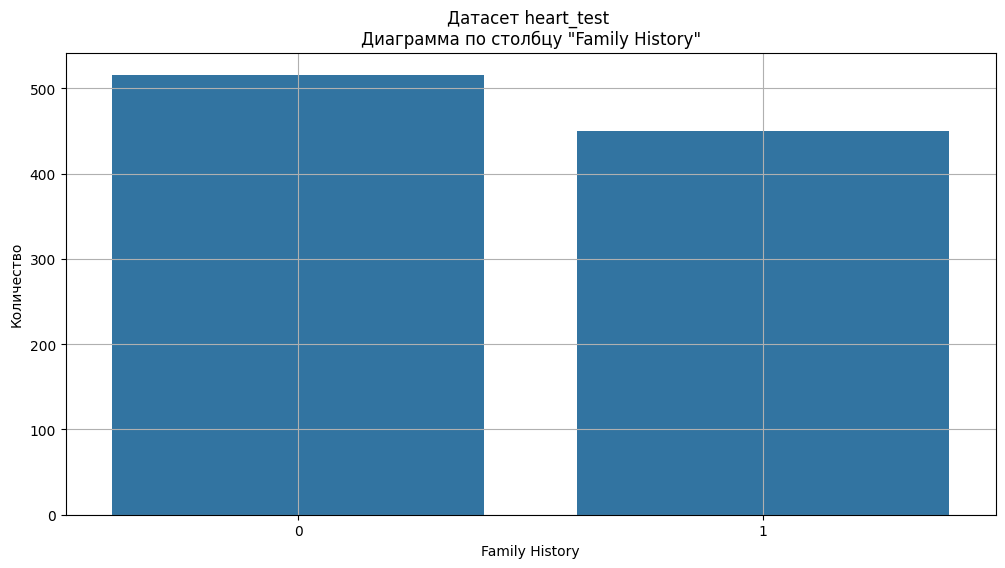

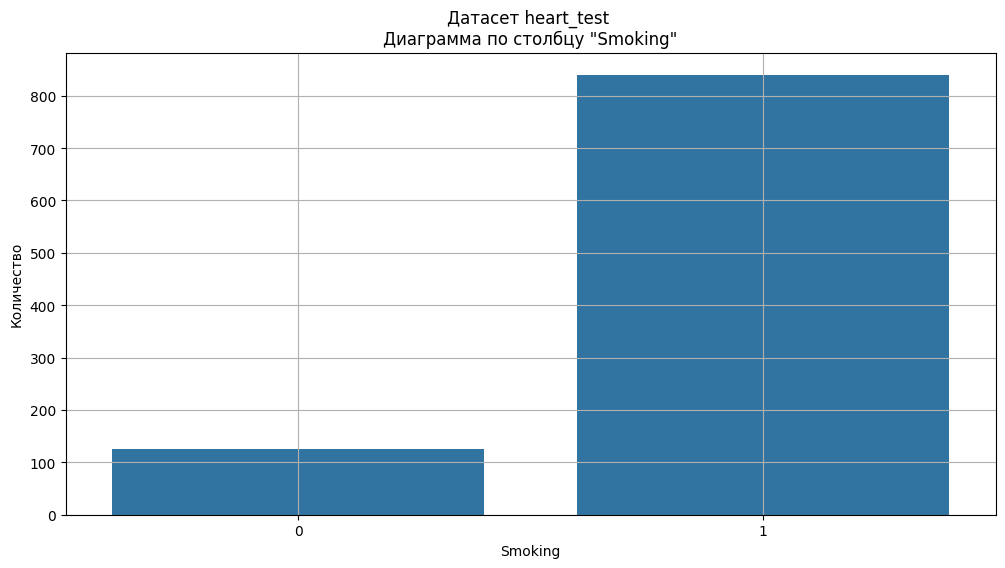

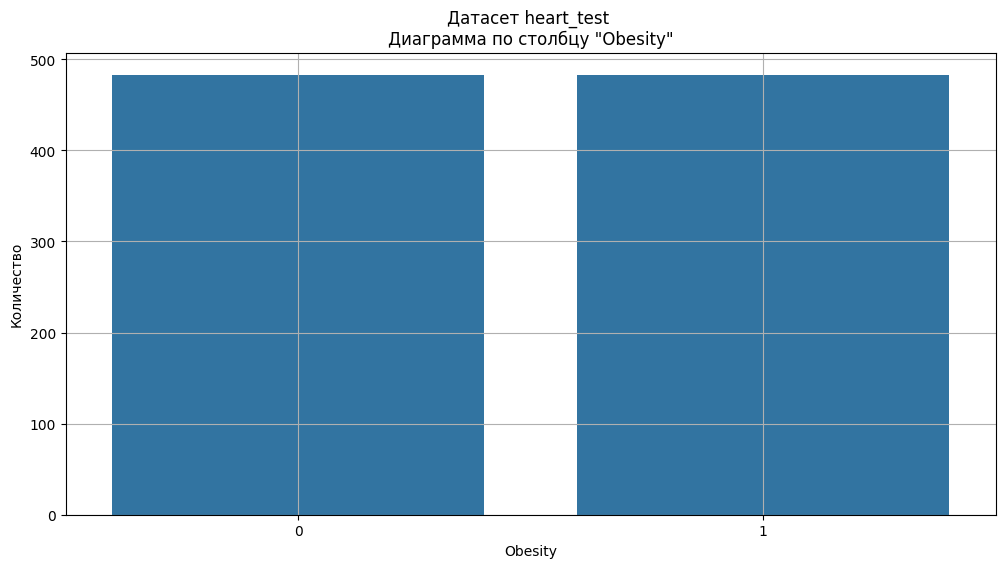

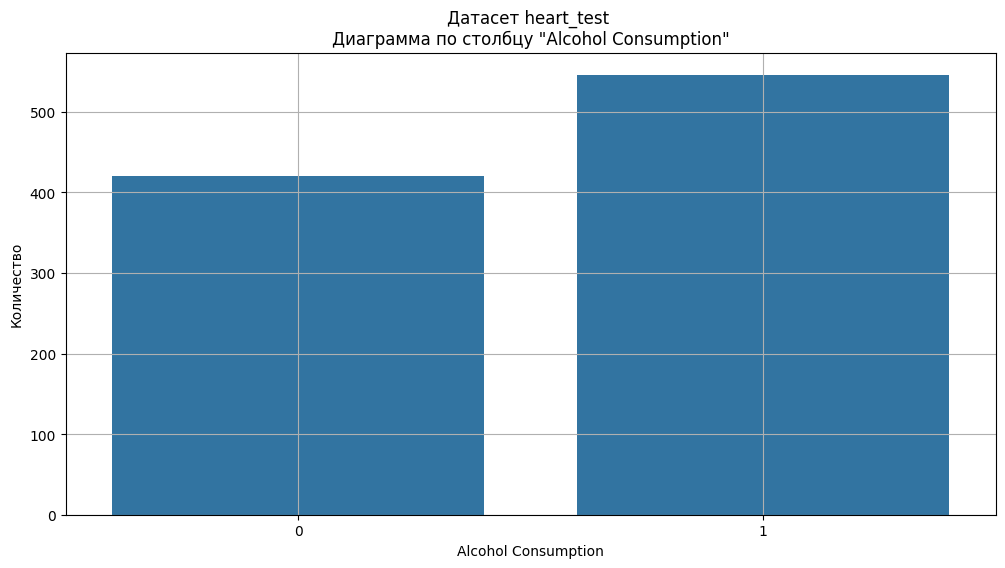

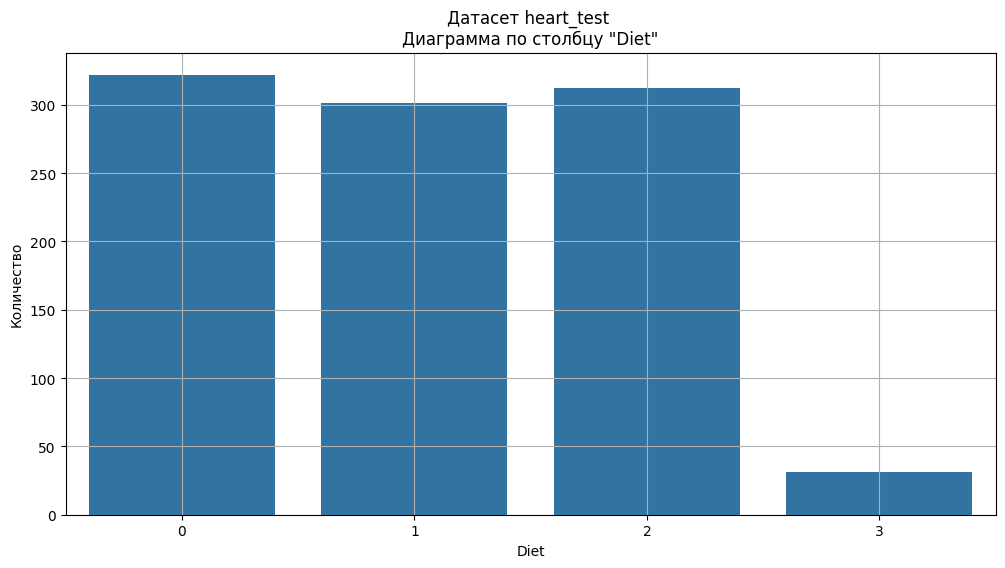

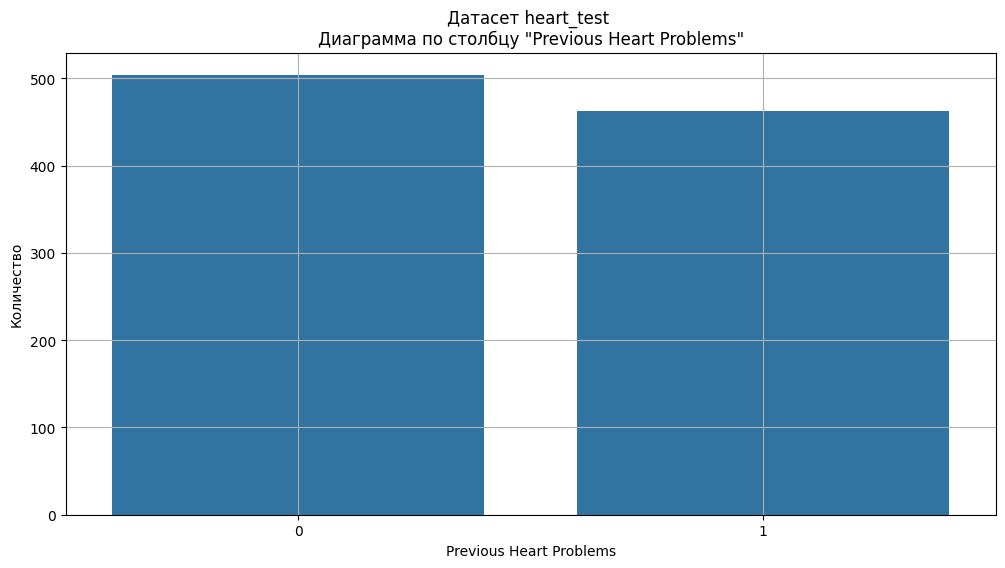

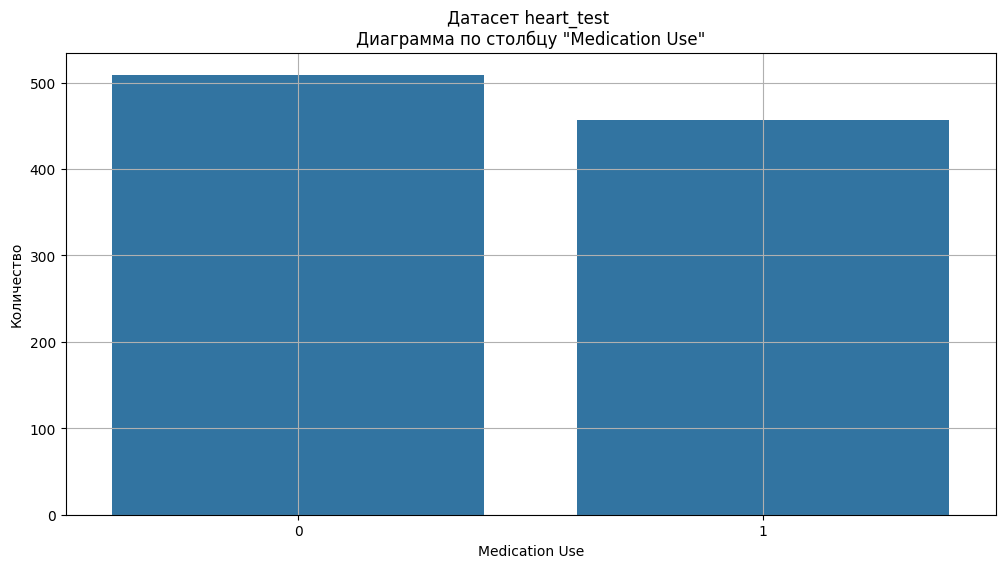

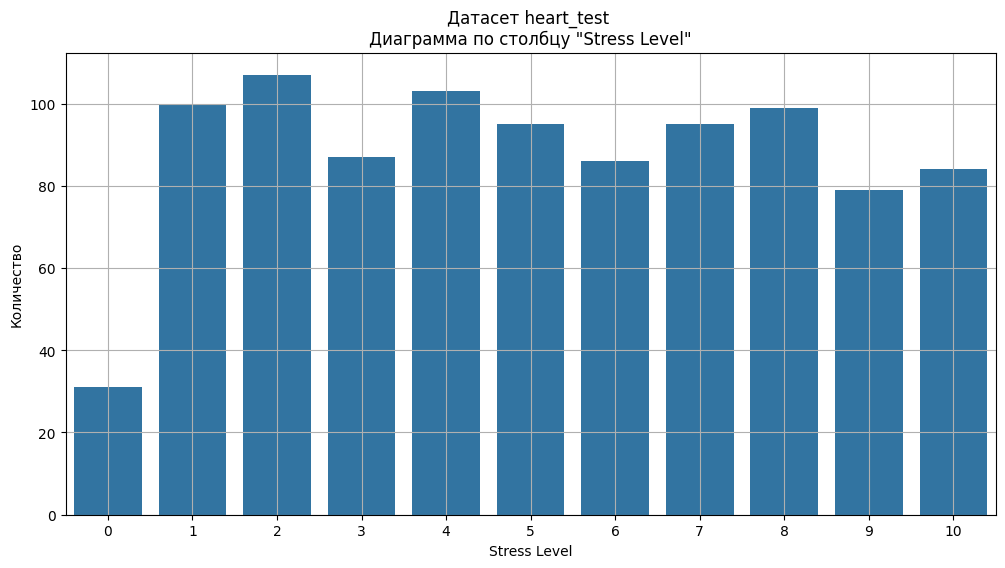

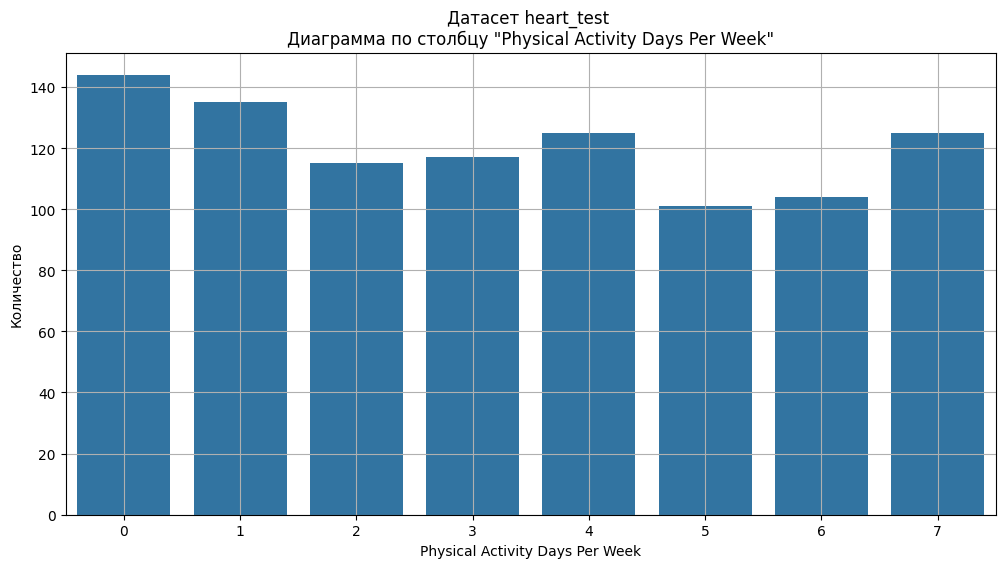

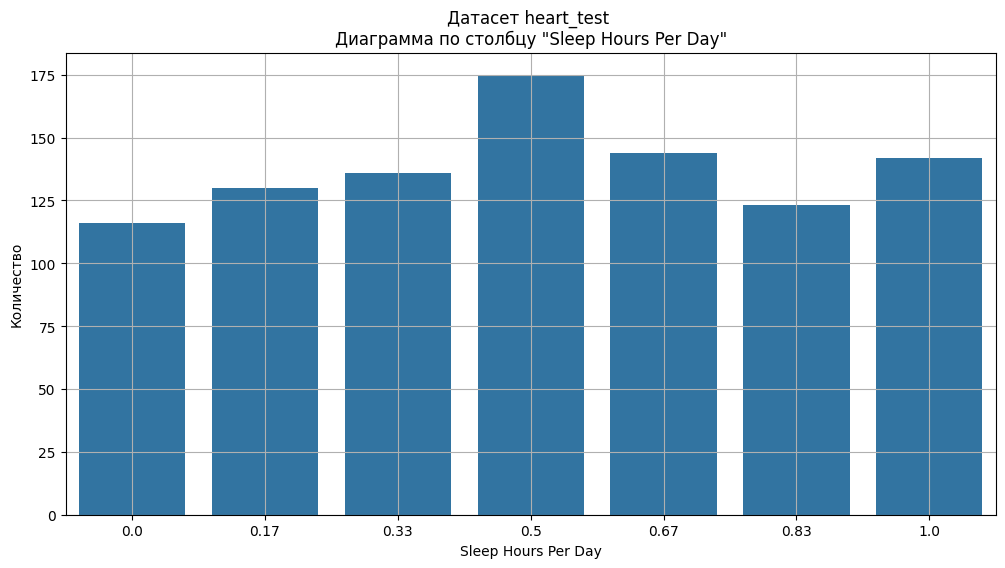

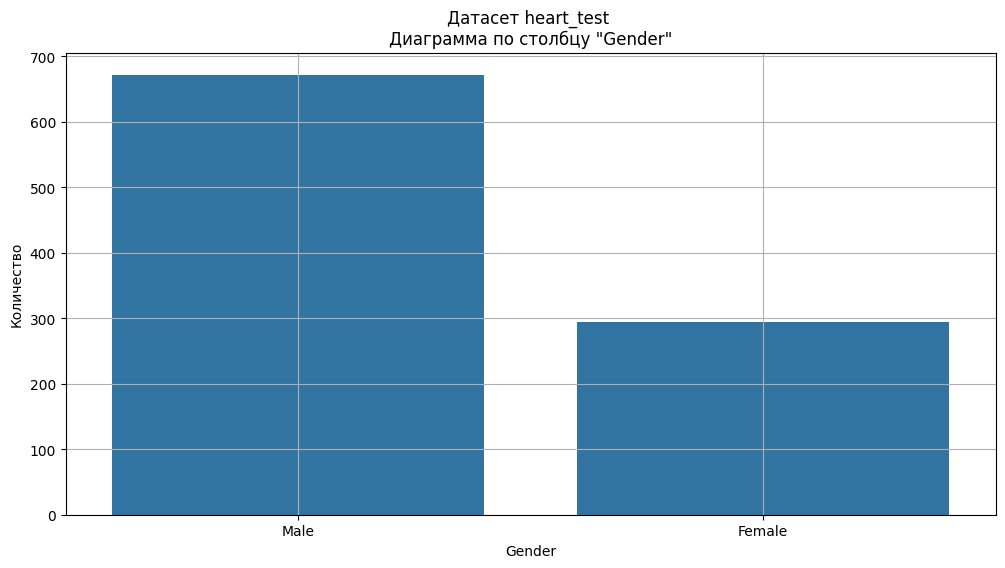

In [32]:
df_hist_dict(dict_1)

По итогу построения гистограмм найден выброс в столбце heart rate, который исправим с помощью приведения к медианному.

In [33]:
dict_1['heart_train'].loc[dict_1['heart_train']['Heart rate'] > 0.5,'Heart rate'] = dict_1['heart_train']['Heart rate'].median()

<Axes: >

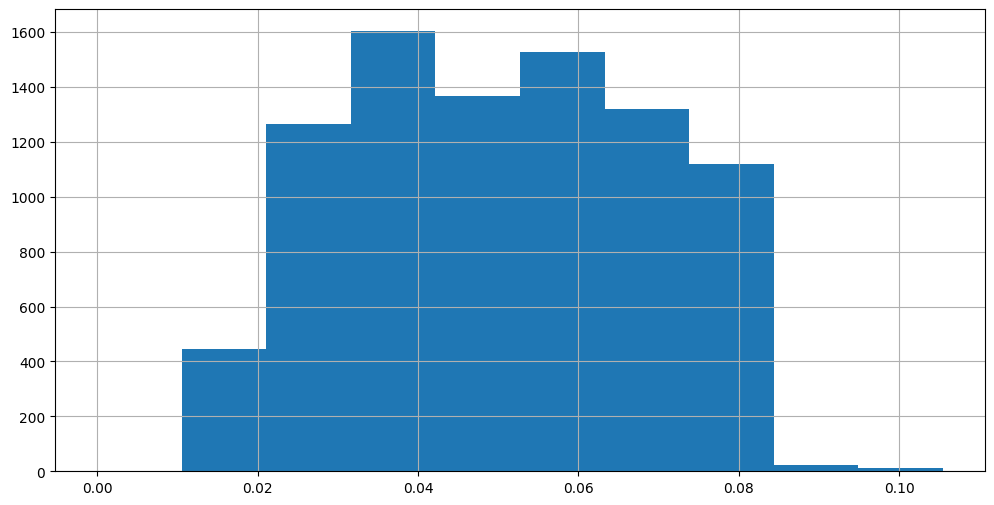

In [34]:
dict_1['heart_train']['Heart rate'].hist()

## Корреляционный анализ

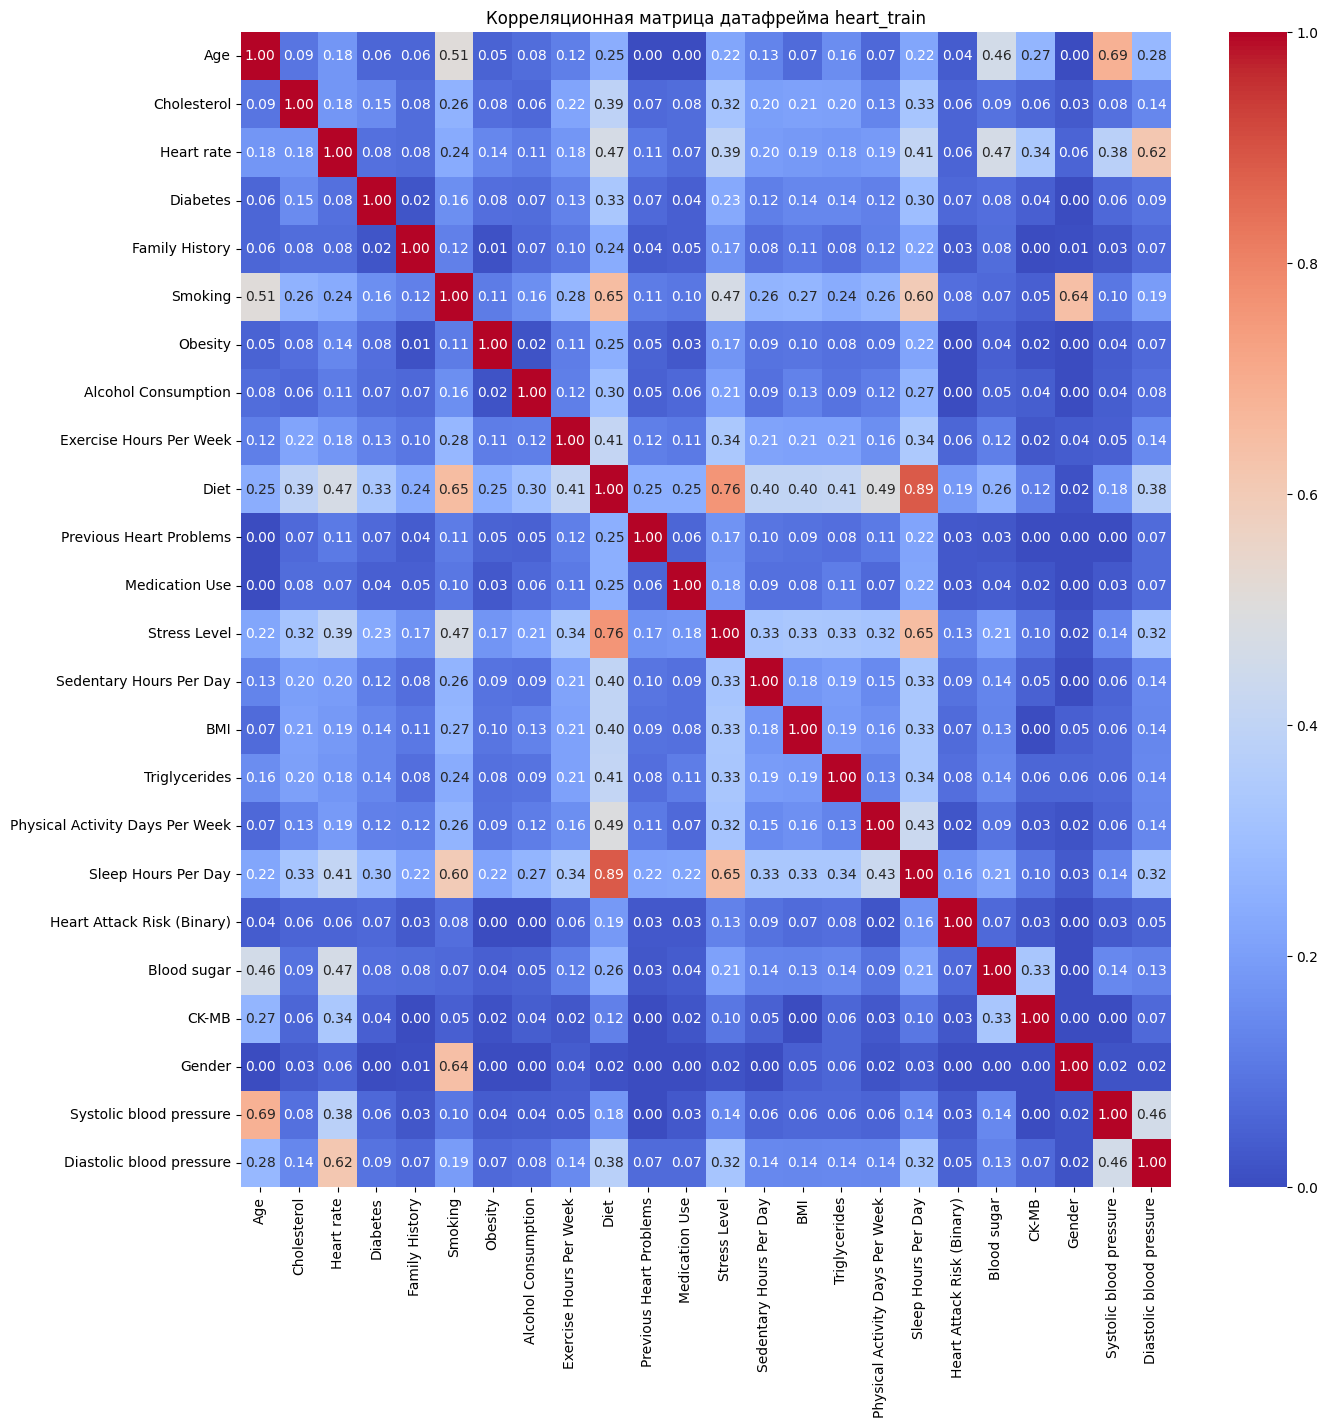

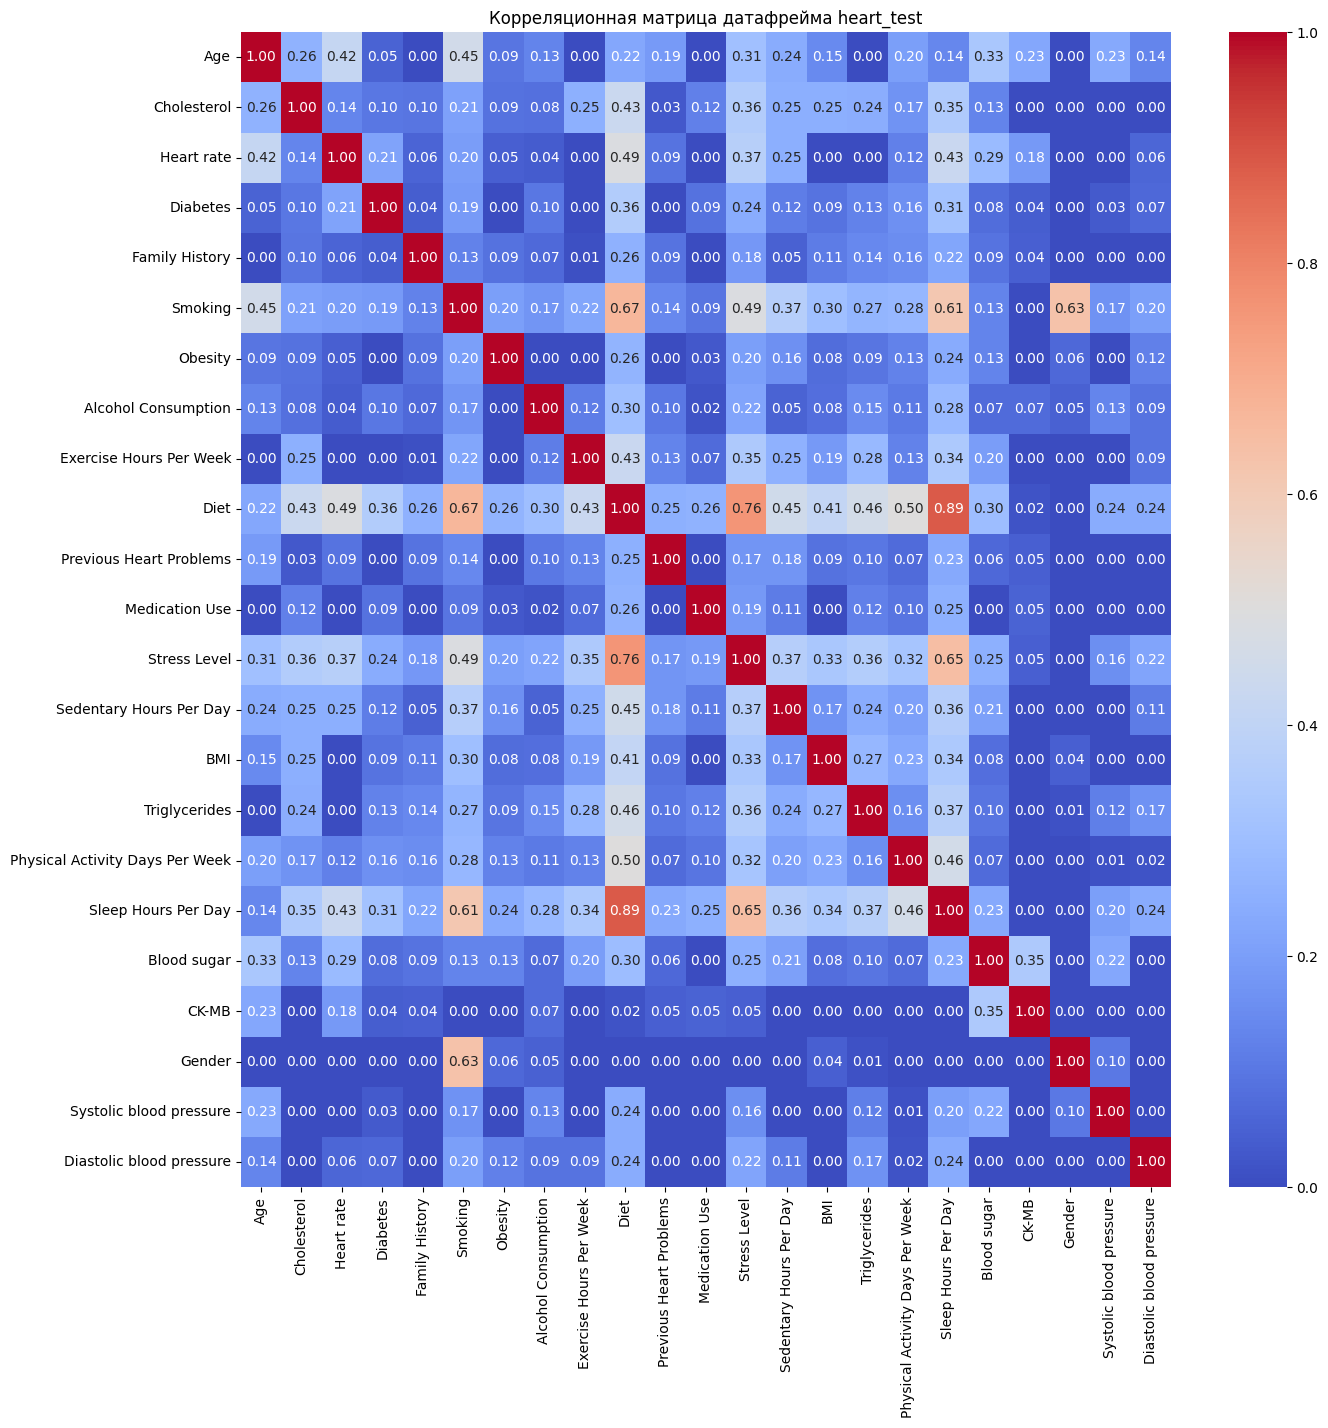

In [35]:
df_corr(dict_1, 
        continuous_features=['Cholesterol',
							 'Exercise Hours Per Week',
							 'Sedentary Hours Per Day',
							 'BMI',
							 'Triglycerides',
							 'Blood sugar',
							 'CK-MB',
							 'Troponin',
							 'Systolic blood pressure',
							 'Diastolic blood pressure']
                             )

## Подготовка данных

In [36]:
X_train = dict_1[list_1[0]].drop(columns=['Heart Attack Risk (Binary)'])
y_train = dict_1[list_1[0]]['Heart Attack Risk (Binary)']
X_test = dict_1[list_1[1]]

X_train.shape, y_train.shape, X_test.shape

((8685, 23), (8685,), (966, 23))

In [37]:
# создаём списки с названиями признаков
cat_columns = X_train.select_dtypes('object').columns.tolist()
ohe_columns = ['Gender']
num_columns = X_train.select_dtypes('number').columns.tolist()


In [38]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', 
                           handle_unknown='infrequent_if_exist',
                           sparse_output=False 
                           )),
     ('simpleImputer_after_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
    )

# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)


# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    # ('poly_features', PolynomialFeatures(degree=2, order='C')),
    # ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])


### Промежуточный вывод

Пайплайн для обучения моделей МО подготовлен. Подготовка данных включена в пайплайн

## Обучение моделей

### DecisionTreeClassifier

In [39]:
param_grid_tree = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE,
                                        #   class_weight='balanced'
                                          )],
        'models__max_depth': range(2,7),
        'models__max_features': range(2,8),
        'models__min_samples_split':range(5,10),
        'models__min_samples_leaf':range(5,10),
        # 'feature_selection__k': range(1, 16, 2),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

In [40]:
randomized_search_tree = df_randomized_search_classifier(pipe_final, param_grid_tree, n_iter=20)

In [41]:
%%time
randomized_search_tree.fit(X_train, y_train)

print(F'Метрика f1: {randomized_search_tree.best_score_}')
print('Лучшая модель и её параметры:\n\n')
randomized_search_tree.best_estimator_

Метрика f1: 0.07425335612386641
Лучшая модель и её параметры:


CPU times: total: 8.78 s
Wall time: 8.99 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Gender']),
                                                 ('...
                                                   'Diet',
                                                   'Previous Heart Problems',
                                                   'Medication Use',
                                                   'Stress Level',
                                                   'Sedentary Hours Per Day',
                                                   'BMI', 'Triglycerides',
                                                   'Physical Activity Days Per '
                                                   'Week',
                                                   'Sleep Hours Per Day',
                                                   'Blood sugar', 'CK-MB',
                                                   'Systolic blood pressure',
                                                   'Diastolic blood '
                                                   'pressure'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=6, max_features=5,
                                        min_samples_leaf=6, min_samples_split=9,
                                        random_state=57))])

### KNN

In [42]:
param_grid_knn = [
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier(n_jobs=-1)],
        'models__n_neighbors': range(2,30, 2),
        # 'feature_selection__k': range(1, 13, 2),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
]

In [43]:
randomized_search_knn = df_randomized_search_classifier(pipe_final, param_grid_knn, n_iter=20)

In [44]:
%%time
randomized_search_knn.fit(X_train, y_train)

print(F'Метрика f1: {randomized_search_knn.best_score_}')
print('Лучшая модель и её параметры:\n\n')
randomized_search_knn.best_estimator_

Метрика f1: 0.18999166148406826
Лучшая модель и её параметры:


CPU times: total: 1min 25s
Wall time: 31.1 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Gender']),
                                                 ('...
                                                   'Family History', 'Smoking',
                                                   'Obesity',
                                                   'Alcohol Consumption',
                                                   'Exercise Hours Per Week',
                                                   'Diet',
                                                   'Previous Heart Problems',
                                                   'Medication Use',
                                                   'Stress Level',
                                                   'Sedentary Hours Per Day',
                                                   'BMI', 'Triglycerides',
                                                   'Physical Activity Days Per '
                                                   'Week',
                                                   'Sleep Hours Per Day',
                                                   'Blood sugar', 'CK-MB',
                                                   'Systolic blood pressure',
                                                   'Diastolic blood '
                                                   'pressure'])])),
                ('models', KNeighborsClassifier(n_jobs=-1, n_neighbors=2))])

### Catboost

In [45]:
X_train

,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,...,Sedentary Hours Per Day,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Gender,Systolic blood pressure,Diastolic blood pressure
id,,,,,,,,,,,,,,,,,,,,,
1,0.595506,0.096429,0.047663,1,1,1,1,1,0.752420,1,...,0.710786,0.274469,0.276623,2,0.666667,0.227018,0.048229,Male,0.574194,0.569767
2,0.595506,0.189286,0.047663,0,0,1,0,1,0.200998,2,...,0.320478,0.890332,0.057143,4,1.000000,0.227018,0.048229,Male,0.187097,0.674419
4,0.078652,0.792857,0.071494,1,0,1,1,0,0.601030,2,...,0.315026,0.169495,0.768831,1,0.166667,0.227018,0.048229,Male,0.251613,0.383721
5,0.078652,0.771429,0.071494,1,1,1,0,1,0.658864,2,...,0.910628,0.394175,0.485714,2,0.666667,0.227018,0.048229,Male,0.735484,0.383721
6,0.078652,0.492857,0.071494,1,0,1,0,0,0.849607,1,...,0.583318,0.834293,0.407792,0,1.000000,0.227018,0.048229,Male,0.419355,0.720930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9646,0.404494,0.499780,0.091659,0,0,0,0,0,0.502110,3,...,0.499920,0.494774,0.503603,0,0.504621,0.081028,0.002029,Female,1.000000,1.000000
9647,0.235955,0.499780,0.049496,0,0,0,0,0,0.502110,3,...,0.499920,0.494774,0.503603,0,0.504621,0.084980,0.003500,Male,0.445161,0.186047
9648,0.348315,0.499780,0.088909,0,0,0,0,0,0.502110,3,...,0.499920,0.494774,0.503603,0,0.504621,0.330040,0.009540,Male,0.225806,0.302326


In [46]:
cat_features = [21]
param_grid_catboost = [
    # словарь для модели CatBoostClassifier() 
    {
        'models': [CatBoostClassifier(
            						#   cat_features=cat_features,
                                      learning_rate=0.1,
                                    #   use_best_model=True,
                                      auto_class_weights='Balanced',
                                      random_state = RANDOM_STATE,
									  eval_metric = 'F1'
                                      )],
        'models__iterations': range(50,100, 50),
        'models__depth': range(4, 12, 2),
        # 'feature_selection__k': range(1, 13, 2),
        'preprocessor__num': ['passthrough'] 
    },
]

In [47]:
randomized_search_catboost = df_randomized_search_classifier(pipe_final, param_grid_catboost, n_iter=10)

In [48]:
%%time
randomized_search_catboost.fit(X_train, y_train)

print('Лучшая модель и её параметры:\n\n')
display(randomized_search_catboost.best_estimator_)
print(F'Метрика f1: {randomized_search_catboost.best_score_}')

c:\Users\navoh\.conda\envs\practicum\lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 0.6552579	total: 147ms	remaining: 7.19s
1:	learn: 0.6552579	total: 150ms	remaining: 3.59s
2:	learn: 0.6626589	total: 154ms	remaining: 2.41s
3:	learn: 0.6711013	total: 158ms	remaining: 1.81s
4:	learn: 0.6532422	total: 162ms	remaining: 1.45s
5:	learn: 0.6563385	total: 166ms	remaining: 1.21s
6:	learn: 0.6605786	total: 170ms	remaining: 1.04s
7:	learn: 0.6592069	total: 174ms	remaining: 911ms
8:	learn: 0.6596320	total: 177ms	remaining: 808ms
9:	learn: 0.6634403	total: 181ms	remaining: 724ms
10:	learn: 0.6612581	total: 185ms	remaining: 655ms
11:	learn: 0.6598783	total: 188ms	remaining: 596ms
12:	learn: 0.6614938	total: 192ms	remaining: 546ms
13:	learn: 0.6641169	total: 195ms	remaining: 502ms
14:	learn: 0.6663433	total: 198ms	remaining: 462ms
15:	learn: 0.6681297	total: 202ms	remaining: 429ms
16:	learn: 0.6651948	total: 205ms	remaining: 398ms
17:	learn: 0.6615521	total: 209ms	remaining: 371ms
18:	learn: 0.6609837	total: 212ms	remaining: 346ms
19:	learn: 0.6624765	total: 215ms	remaini

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='infrequent_if_exist',
                                                                                 sparse_output=False)),
                                                                  ('simpleImputer_after_ohe',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Gender']),
                                                 ('...
                                                   'Alcohol Consumption',
                                                   'Exercise Hours Per Week',
                                                   'Diet',
                                                   'Previous Heart Problems',
                                                   'Medication Use',
                                                   'Stress Level',
                                                   'Sedentary Hours Per Day',
                                                   'BMI', 'Triglycerides',
                                                   'Physical Activity Days Per '
                                                   'Week',
                                                   'Sleep Hours Per Day',
                                                   'Blood sugar', 'CK-MB',
                                                   'Systolic blood pressure',
                                                   'Diastolic blood '
                                                   'pressure'])])),
                ('models',
                 <catboost.core.CatBoostClassifier object at 0x000001CF5D6528E0>)])

Метрика f1: 0.44076922564278886
CPU times: total: 1min 24s
Wall time: 20.1 s


In [51]:
catboost_model = randomized_search_catboost.best_estimator_.named_steps['models']
# catboost_model.save_model('catboost_model')

#### Catboost без pipeline

In [52]:
train_data = X_train.copy()
train_labels = y_train.copy()
cat_features = [20]

cv_dataset = Pool(data=train_data,
                  label=train_labels,
                  cat_features=cat_features)

params = {"iterations": 100,
          "depth": 10,
          'learning_rate': 0.1,
          "loss_function": "Logloss",
          "verbose": False,
          'eval_metric': 'F1',
          'custom_metric': ['AUC'],
          'random_state': RANDOM_STATE,
          'auto_class_weights': 'Balanced'}

scores = cv(cv_dataset,
            params,
            fold_count=5,
            shuffle=True,
            plot=True)

f1_mean = scores['test-F1-mean'].iloc[-1]
f1_std  = scores['test-F1-std'].iloc[-1]
AUC_mean = scores['test-AUC-mean'].iloc[-1]
AUC_std  = scores['test-AUC-std'].iloc[-1]

print(f'F1 CV: {f1_mean:.4f} ± {f1_std:.4f}')
print(f'AUC CV: {AUC_mean:.4f} ± {AUC_std:.4f}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.5632533714
bestIteration = 1

Training on fold [1/5]

bestTest = 0.5789205994
bestIteration = 1

Training on fold [2/5]

bestTest = 0.5599512874
bestIteration = 2

Training on fold [3/5]

bestTest = 0.5521397301
bestIteration = 3

Training on fold [4/5]

bestTest = 0.5627275654
bestIteration = 2

F1 CV: 0.4370 ± 0.0113
AUC CV: 0.5878 ± 0.0123


In [53]:
params_2 = {"iterations": 50,
          "depth": 6,
          'learning_rate': 0.1,
          "loss_function": "Logloss",
          "verbose": False,
          'eval_metric': 'F1',
          'custom_metric': ['AUC'],
          'random_state': RANDOM_STATE,
          'auto_class_weights': 'Balanced'}

scores = cv(cv_dataset,
            params_2,
            fold_count=5,
            shuffle=True,
            plot=True)

f1_mean = scores['test-F1-mean'].iloc[-1]
f1_std  = scores['test-F1-std'].iloc[-1]
AUC_mean = scores['test-AUC-mean'].iloc[-1]
AUC_std  = scores['test-AUC-std'].iloc[-1]

print(f'F1 CV: {f1_mean:.4f} ± {f1_std:.4f}')
print(f'AUC CV: {AUC_mean:.4f} ± {AUC_std:.4f}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.6228301534
bestIteration = 2

Training on fold [1/5]

bestTest = 0.601165651
bestIteration = 2

Training on fold [2/5]

bestTest = 0.6095828526
bestIteration = 1

Training on fold [3/5]

bestTest = 0.6167073774
bestIteration = 2

Training on fold [4/5]

bestTest = 0.6225290311
bestIteration = 0

F1 CV: 0.5444 ± 0.0175
AUC CV: 0.5488 ± 0.0085


In [54]:
model = CatBoostClassifier(**params_2)
model.fit(train_data,
          train_labels,
          cat_features=cat_features)

In [55]:
model.save_model('catboost_model')

In [ ]:
import pickle

with open("catboost_model.pkl", "wb") as f:
    pickle.dump(model, f)

### Значимость признаков

,mean_abs_shap
Diet,0.058758
Stress Level,0.050207
CK-MB,0.049262
Systolic blood pressure,0.040299
Sleep Hours Per Day,0.035090
BMI,0.034312
Cholesterol,0.029603
Triglycerides,0.027648
Physical Activity Days Per Week,0.025548
Exercise Hours Per Week,0.022842


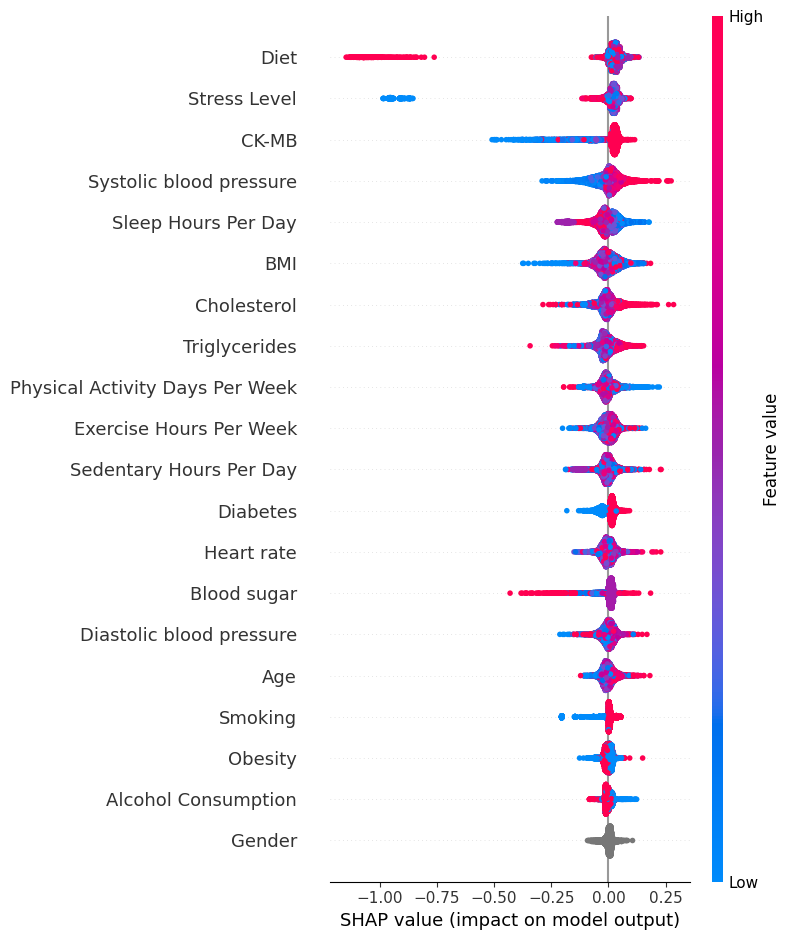

In [ ]:
shap_values = model.get_feature_importance(
    data=Pool(train_data, cat_features=cat_features),
    type='ShapValues'
)

# последний столбец — base value, его убираем
shap_values = shap_values[:, :-1]

shap_df = pd.DataFrame(
    abs(shap_values).mean(axis=0),
    index=train_data.columns,
    columns=['mean_abs_shap']
).sort_values('mean_abs_shap', ascending=False)

display(shap_df)

shap.summary_plot(
    shap_values,
    train_data,
    plot_type="dot",   # классический beeswarm
    max_display=20     # сколько признаков показывать
)

In [64]:
perm_importance = model.get_feature_importance(
    data=Pool(train_data, train_labels, cat_features=cat_features),
    type='FeatureImportance'
)

fi_perm = pd.DataFrame({
    'feature': train_data.columns,
    'importance': perm_importance
}).sort_values('importance', ascending=False)

fi_perm


,feature,importance
12,Stress Level,15.759768
9,Diet,14.883358
14,BMI,7.697502
19,CK-MB,6.116573
13,Sedentary Hours Per Day,5.425430
21,Systolic blood pressure,5.058945
1,Cholesterol,4.640535
15,Triglycerides,4.584452
2,Heart rate,4.549753
17,Sleep Hours Per Day,4.390389


## Вывод
Наимболее важными признаками являются:
- Diet
- Stress level
- CK-MB
- Systolic blood pressure
- Sleep hours per day

По итогу обучения удалось получить модель с метриками:
- F1 - 0,55
- ROC_AUC - 0.54